# SAI RAM THOTA - D3675166

# Medical Insurence Cost prediction

#### Medical insurance cost prediction involves using machine learning models to estimate healthcare expenses based on various factors such as age, BMI, location, and smoking habits. This predictive analysis helps insurance assess risks, set premiums, and optimize healthcare resource allocation. Accurate predictions enable better financial planning and customer service in the insurance industry.

## Importing the neccessary libraries

In [1]:
# Importing fundamental libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # Enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.ensemble import RandomForestRegressor  # Random forest model
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Evaluation metrics
import joblib  # For saving and loading models


## Loading The Data

In [2]:
# Step 2: Load the data
train_df = pd.read_csv(r"C:\Users\D3675166\OneDrive - Teesside University\ML Final-D3675166\insurance.csv")

train_df

In [188]:
# Displaying summary statistics of the data
train_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [189]:
# Displaying information about the data types and missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [190]:
# Checking for missing values in the dataset
train_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exploring the Dataset for Understanding and Analysis

In [191]:
train_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Lets select our categorical and Numerical Columns

In [192]:
# Selecting categorical columns with dtype object, and converting the columns into dtype string
categorical_cols = train_df.select_dtypes(include = 'object').columns
train_df[categorical_cols] = train_df[categorical_cols].astype('string')
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [193]:
# Displaying data type of 'sex' column
train_df['sex'].dtype

string[python]

In [194]:
# selecting columns with dtypes int and float
numerical_cols = train_df.select_dtypes(include = np.number).columns
numerical_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

## Exploratory Data Analysis and Visualization

In [195]:
# importing the data visualization libraries 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#00000000'

In [196]:
# Displaying selected categorical and numerical columns
categorical_cols,numerical_cols

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

## 1. Sex Column

In [197]:
# Displaying distribution of values in 'sex' column
train_df.sex.value_counts()/len(train_df.sex)

male      0.505232
female    0.494768
Name: sex, dtype: Float64

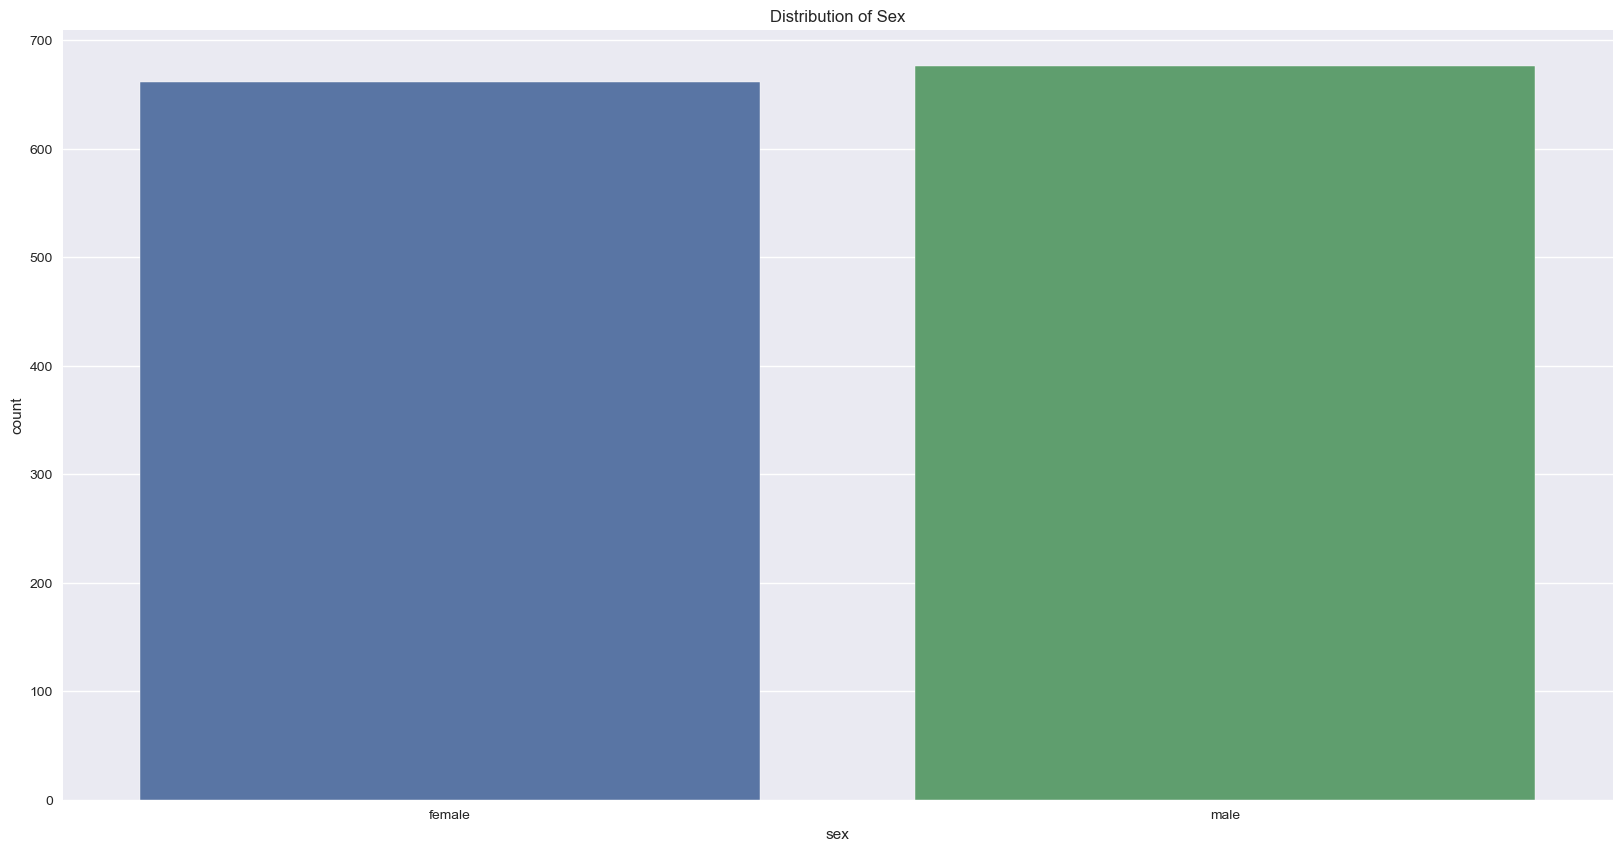

In [198]:
# plotting a countplot
sns.countplot(x = 'sex', data = train_df).set(title = 'Distribution of Sex');

## 2. Smoker Column

In [199]:
train_df[['smoker']]

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


In [200]:
# Displaying distribution of values in 'smoker' column
train_df.smoker.value_counts()/len(train_df.smoker)

no     0.795217
yes    0.204783
Name: smoker, dtype: Float64

It looks like almost 80 % of the customers do not smoke.

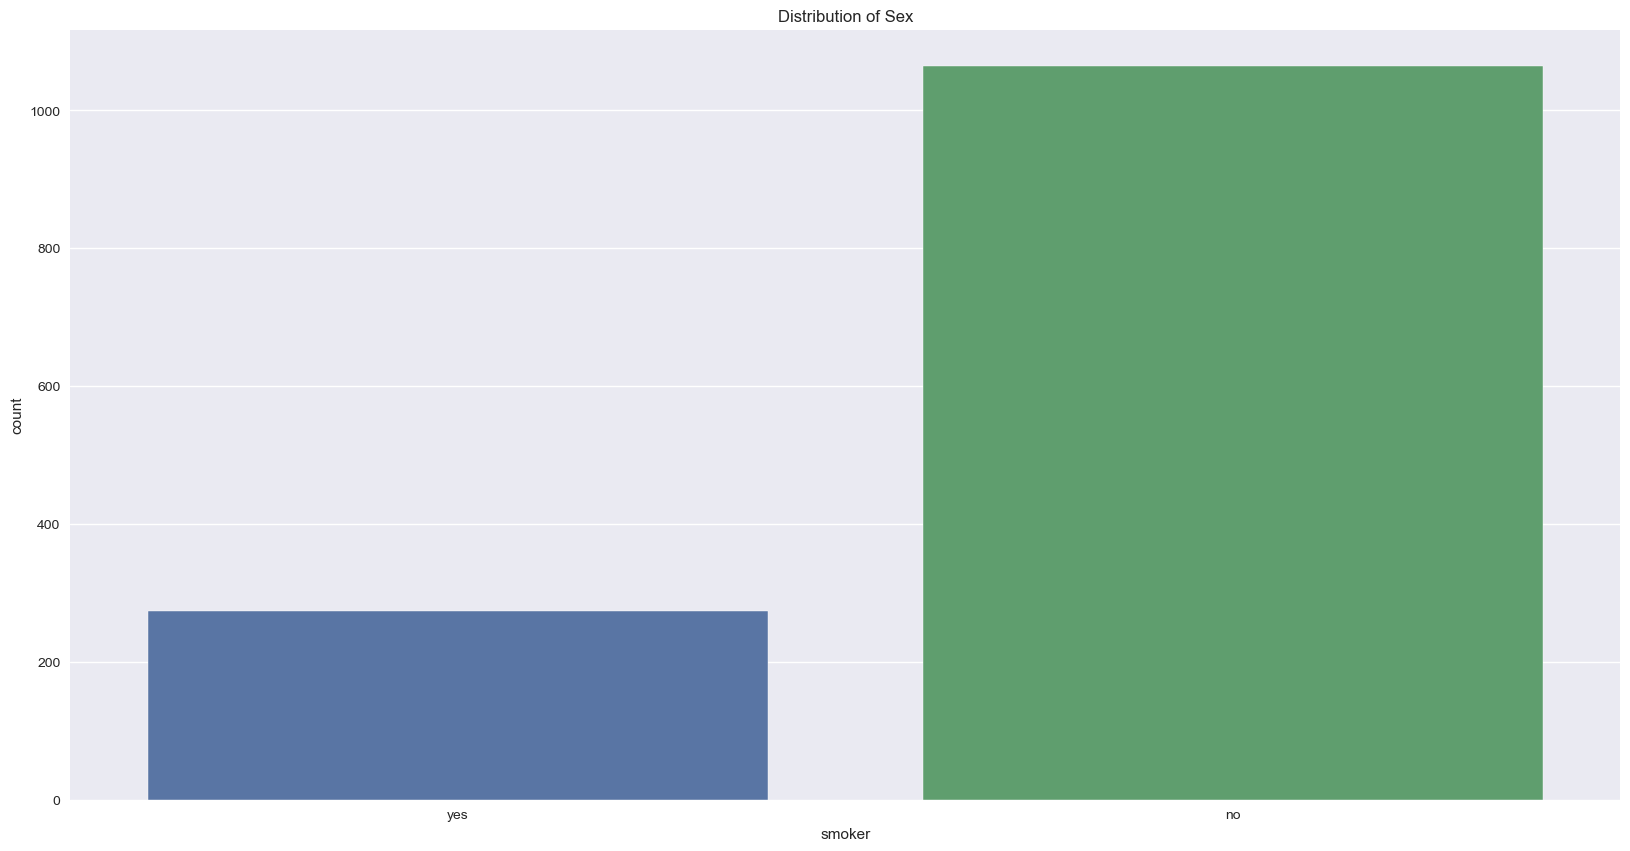

In [201]:
sns.countplot(x = train_df.smoker).set(title = 'Distribution of Sex');

## 3. Region Column

In [202]:
train_df.region

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: string

In [203]:
# Displaying distribution of values in 'region' column
train_df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: Int64

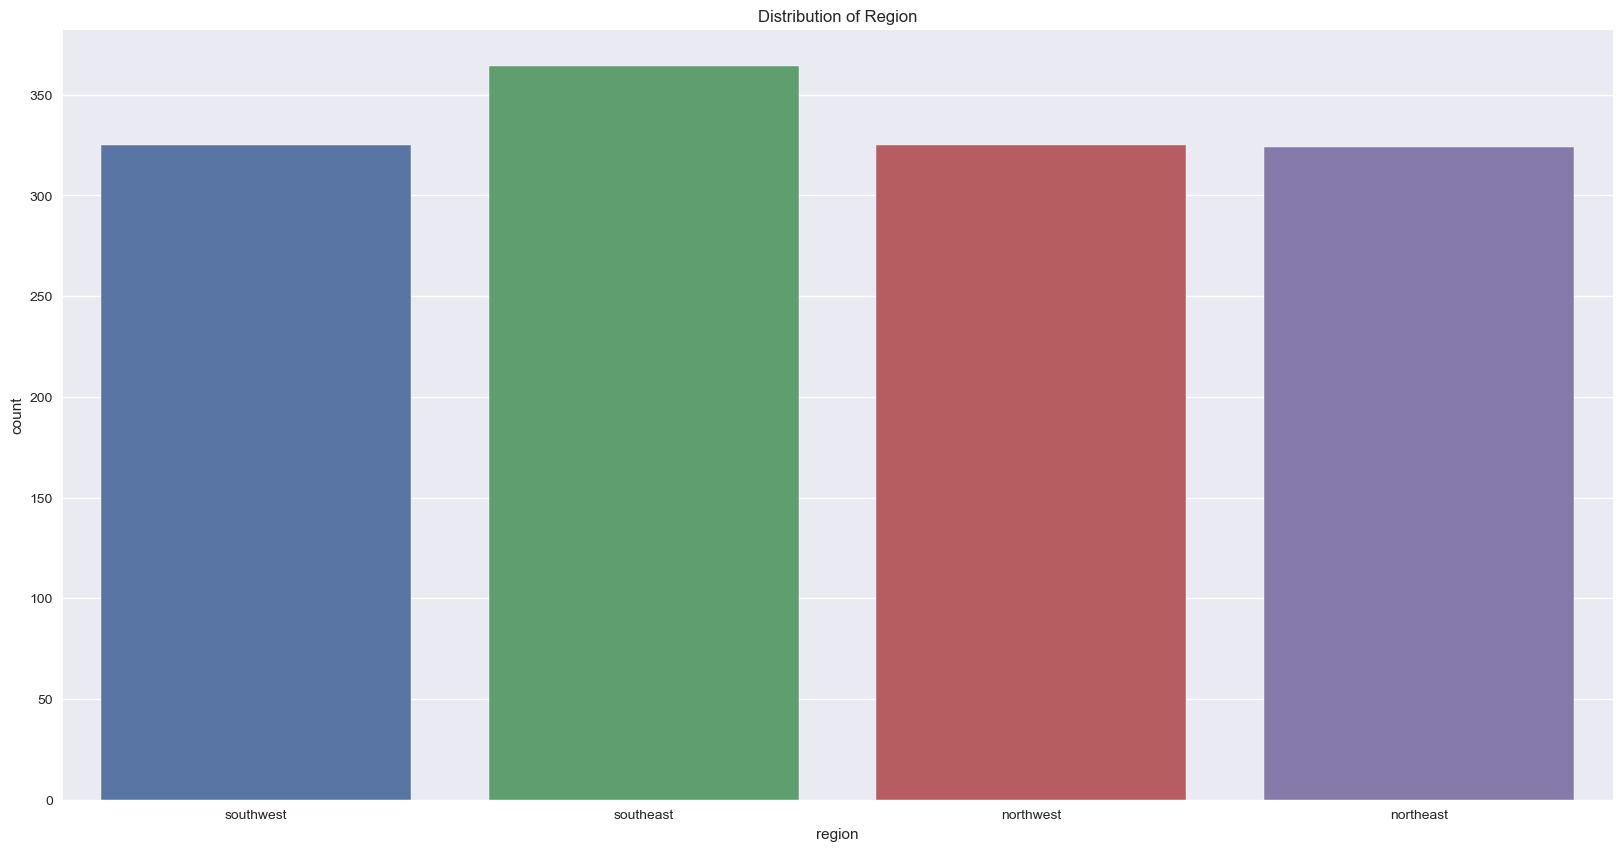

In [204]:
# Plotting a countplot for 'region' column
sns.countplot(x=train_df.region).set(title='Distribution of Region');

###### We can clearly see that the majority of customers are from southeast region.

## 4. Age Column

In [20]:
# Displaying unique values count in 'age' column
len(train_df.age.unique().tolist())

47

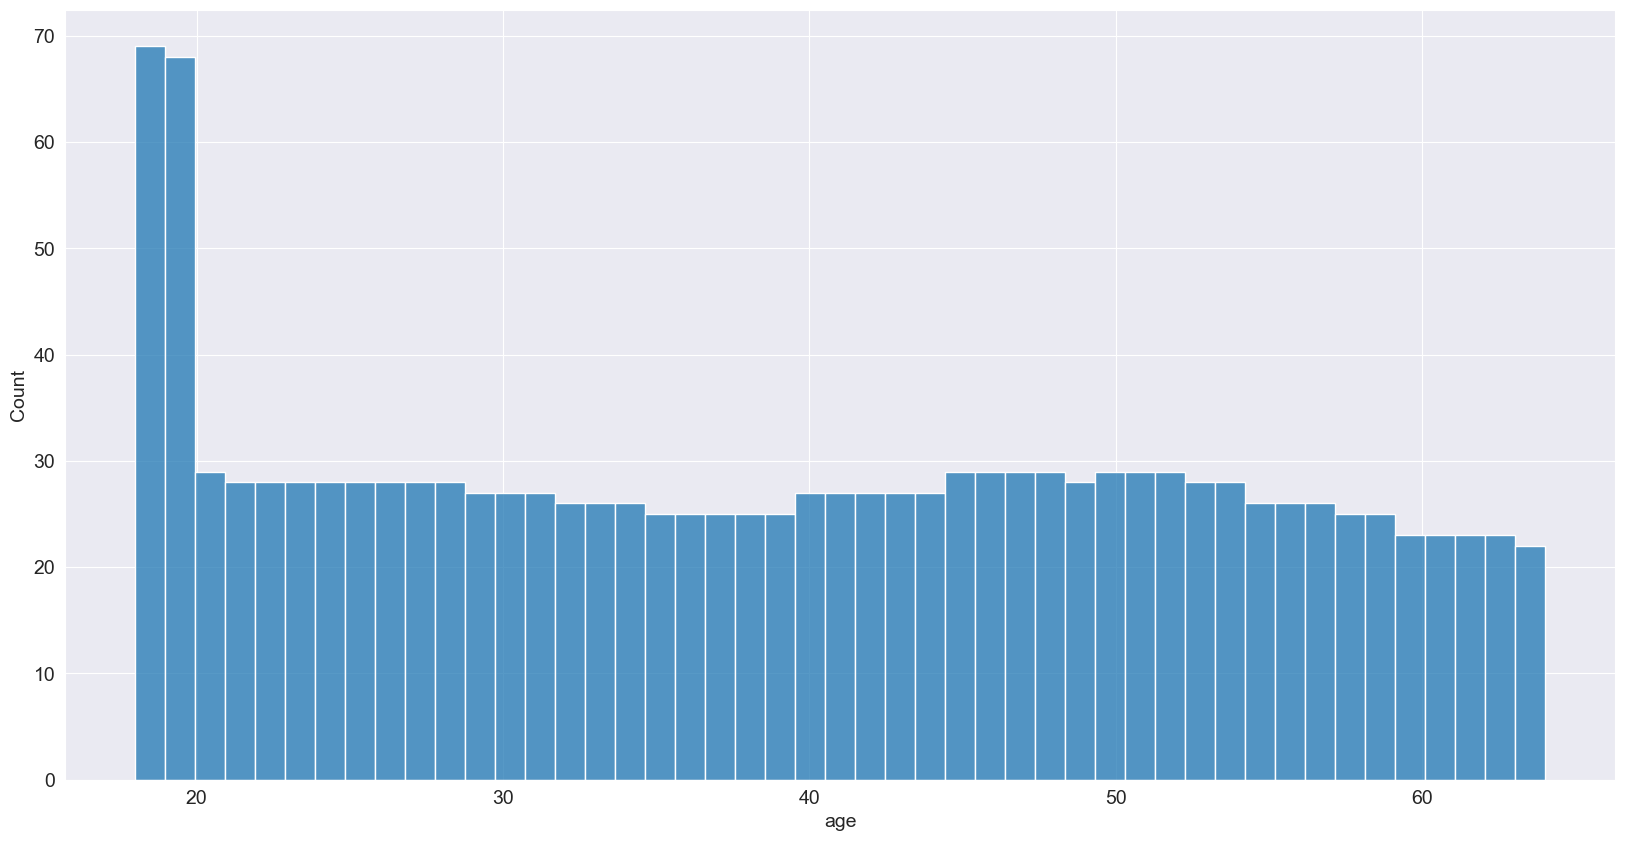

In [21]:
# Plotting a histogram for 'age' column
sns.histplot(x = train_df.age, bins = 47);

##### We can clearly see that the age column has almost a uniform distribution.

## 5. BMI Column

In [22]:
train_df.bmi

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

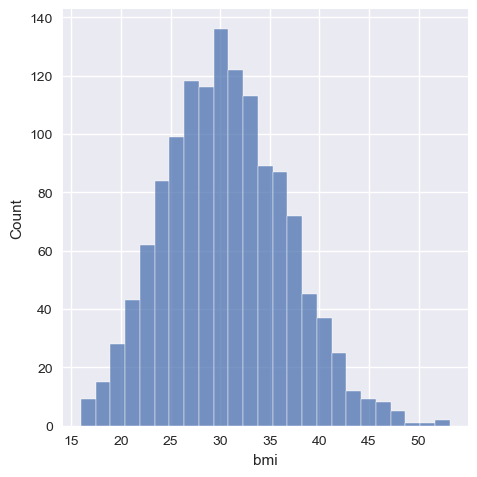

In [205]:
# Plotting a distribution plot for 'bmi' column
sns.displot(x = train_df.bmi);

We can clearly see that the bmi column has a normal distribution.

## 6. Children Column

In [206]:
# Displaying value counts for 'children' column
train_df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

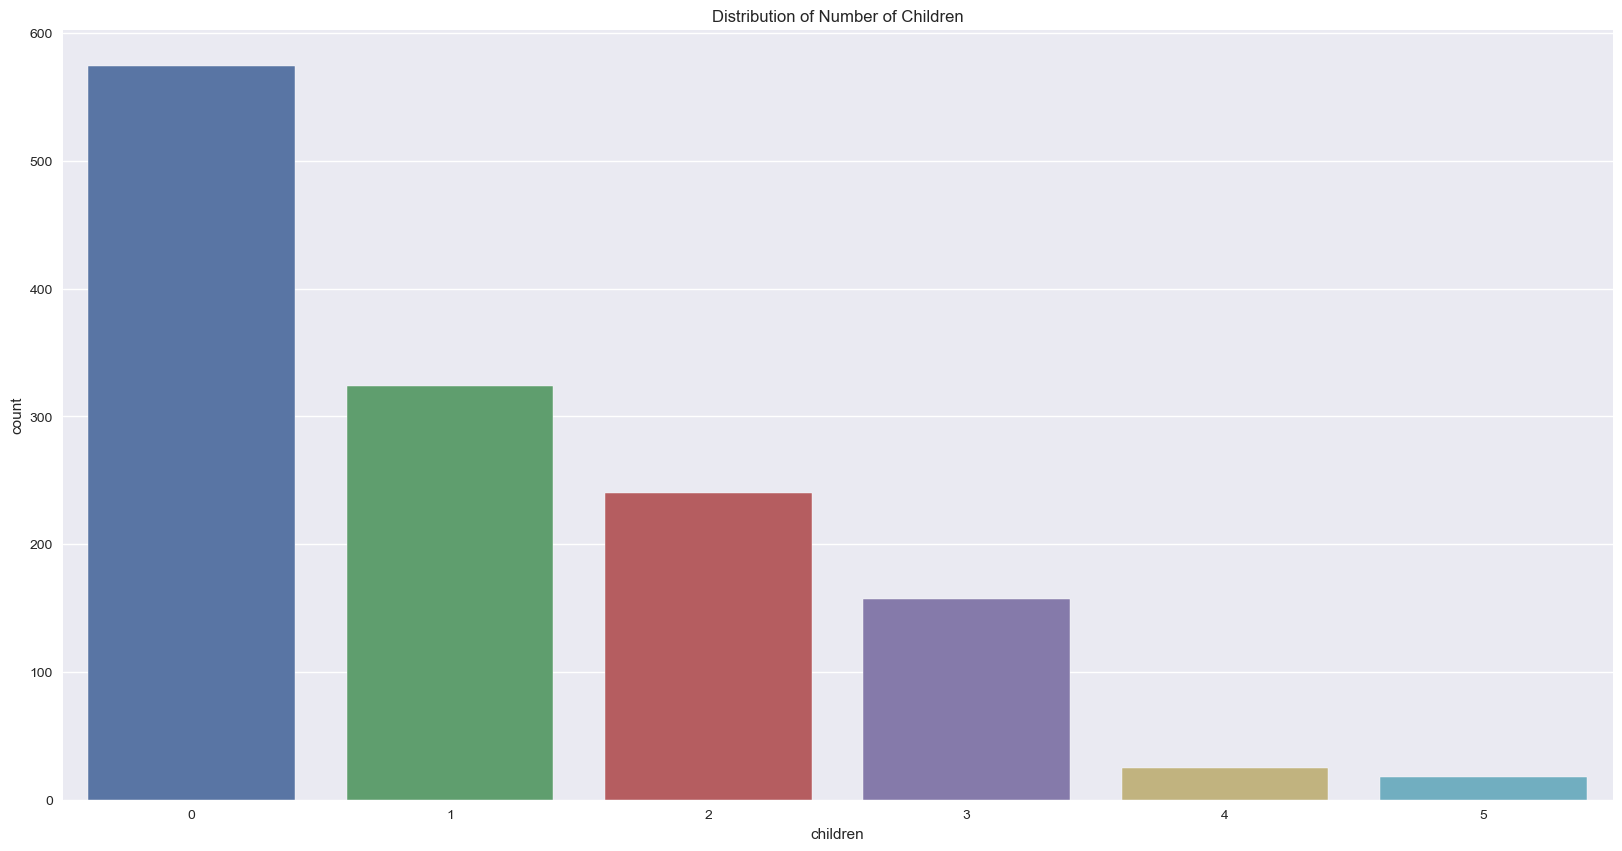

In [207]:
# Plotting a countplot for 'children' column
sns.countplot(x = train_df.children).set(title = 'Distribution of Number of Children');

## 7. Charges Column

In [209]:
train_df.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

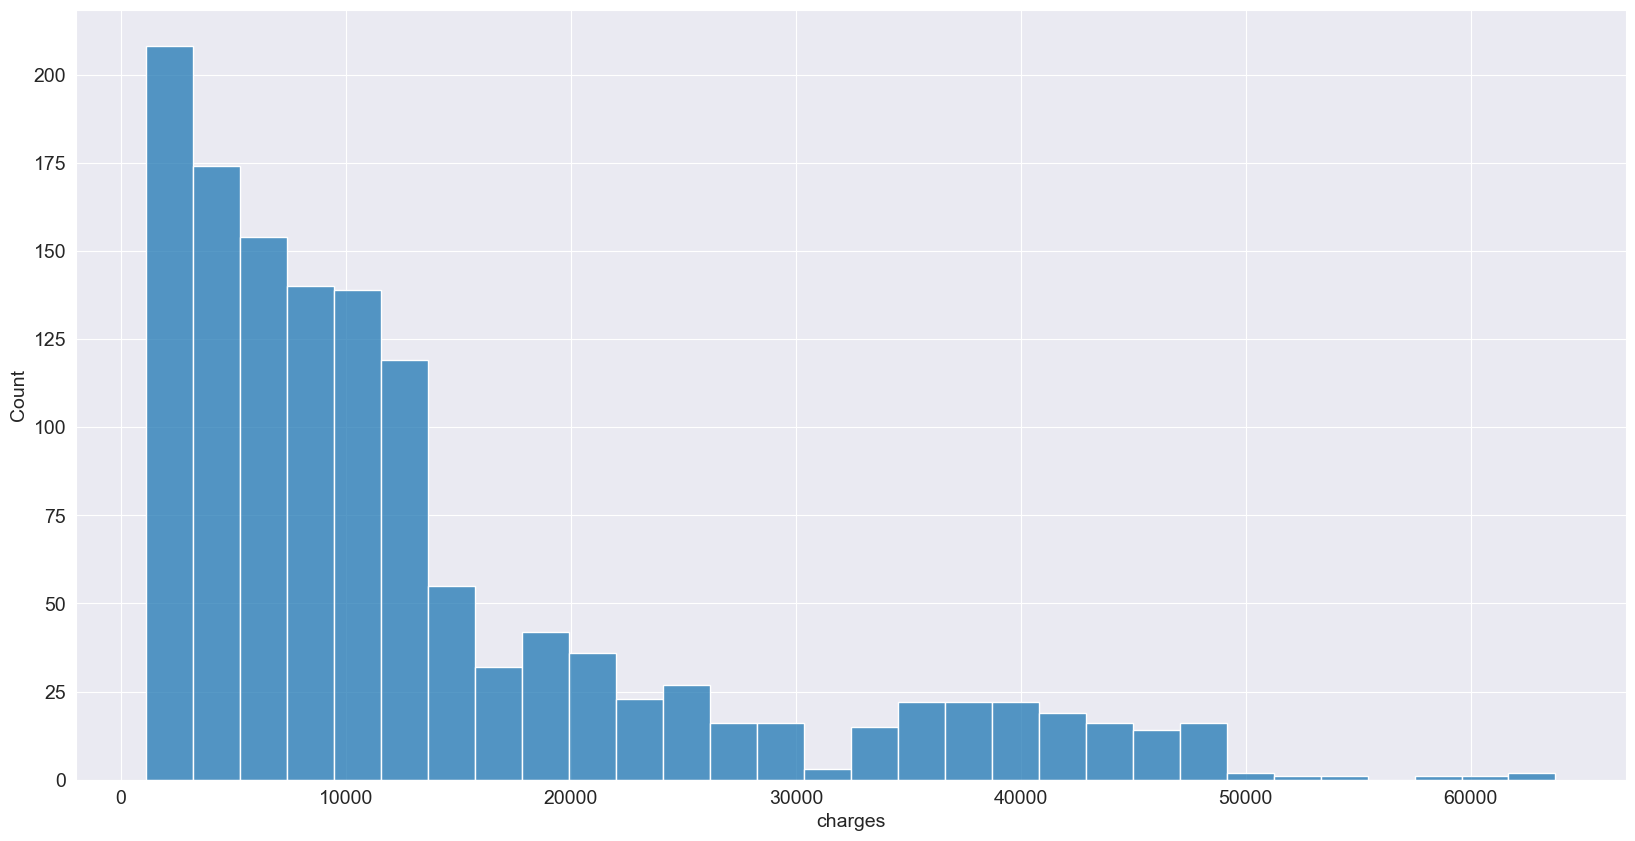

In [27]:
# Plotting a histogram for 'charges' column
sns.histplot(x = train_df.charges, bins = 30);

### Scatterplot
####  Age vs Charges According to Smoker, Sex, Region, and Children

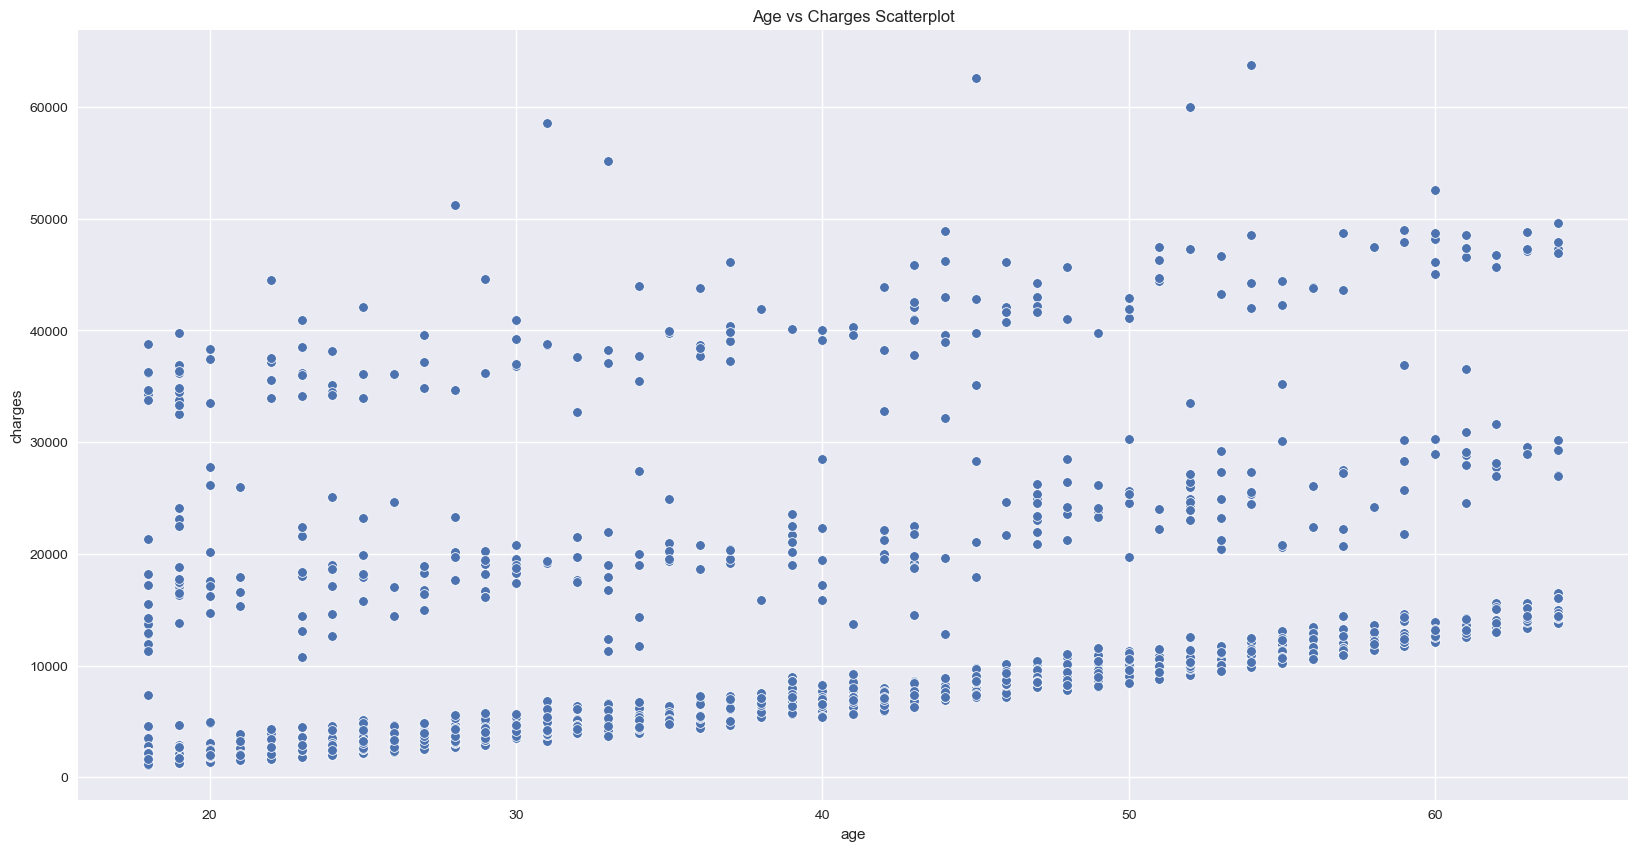

In [210]:
# Plotting a scatterplot for 'age' vs 'charges'
sns.scatterplot(x = 'age', y = 'charges', data = train_df).set(title = "Age vs Charges Scatterplot");

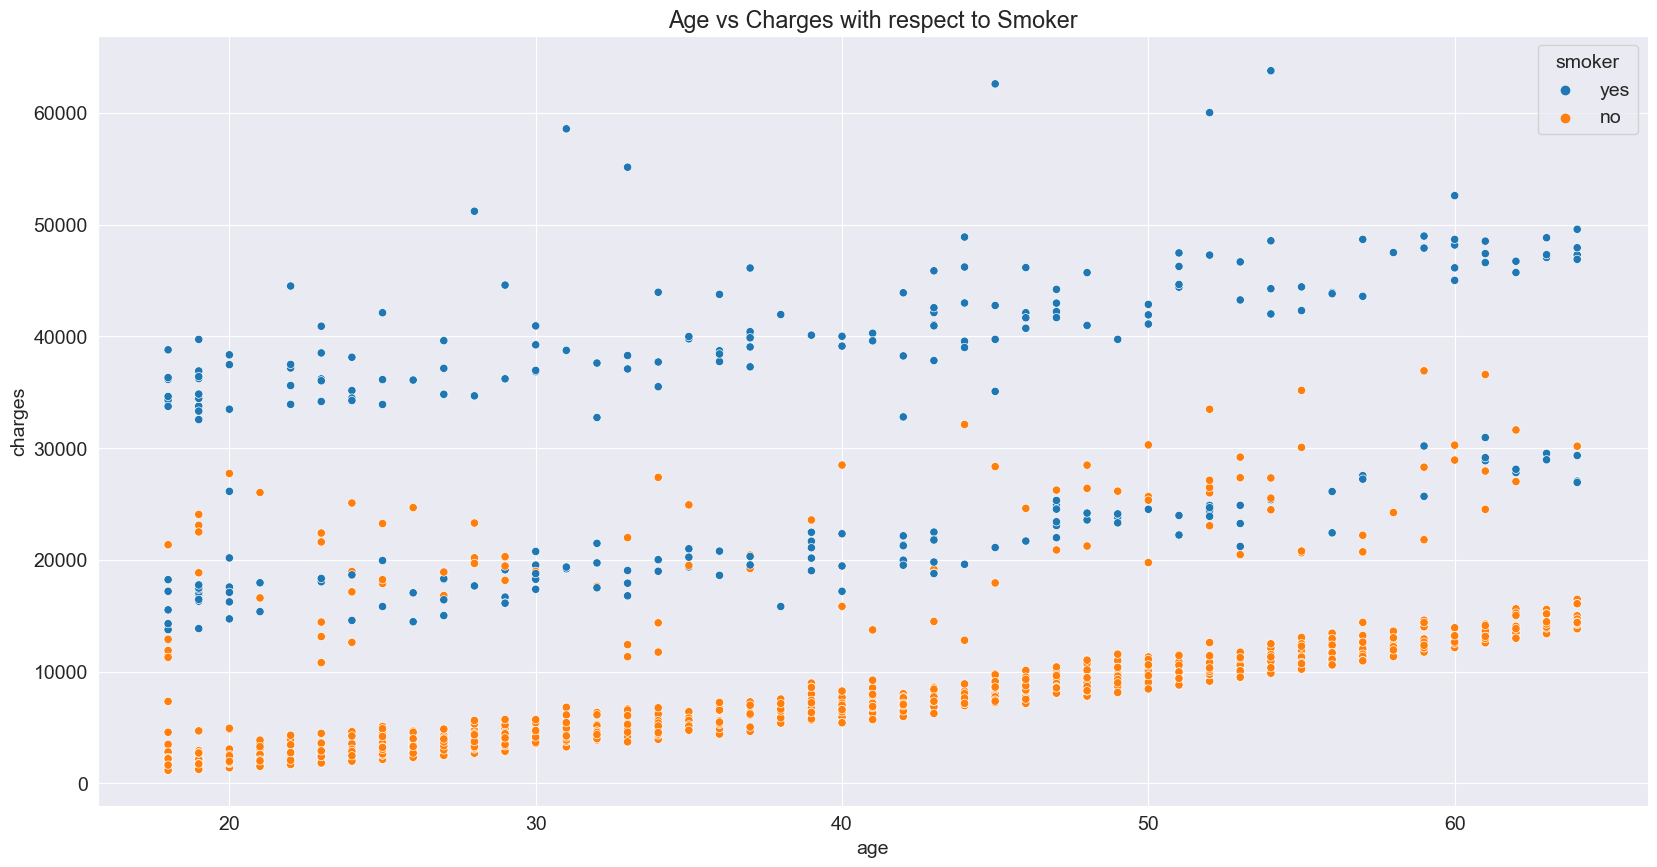

In [29]:
# Plotting a scatterplot for 'age' vs 'charges' with respect to 'smoker'
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = train_df).set(title = "Age vs Charges with respect to Smoker");

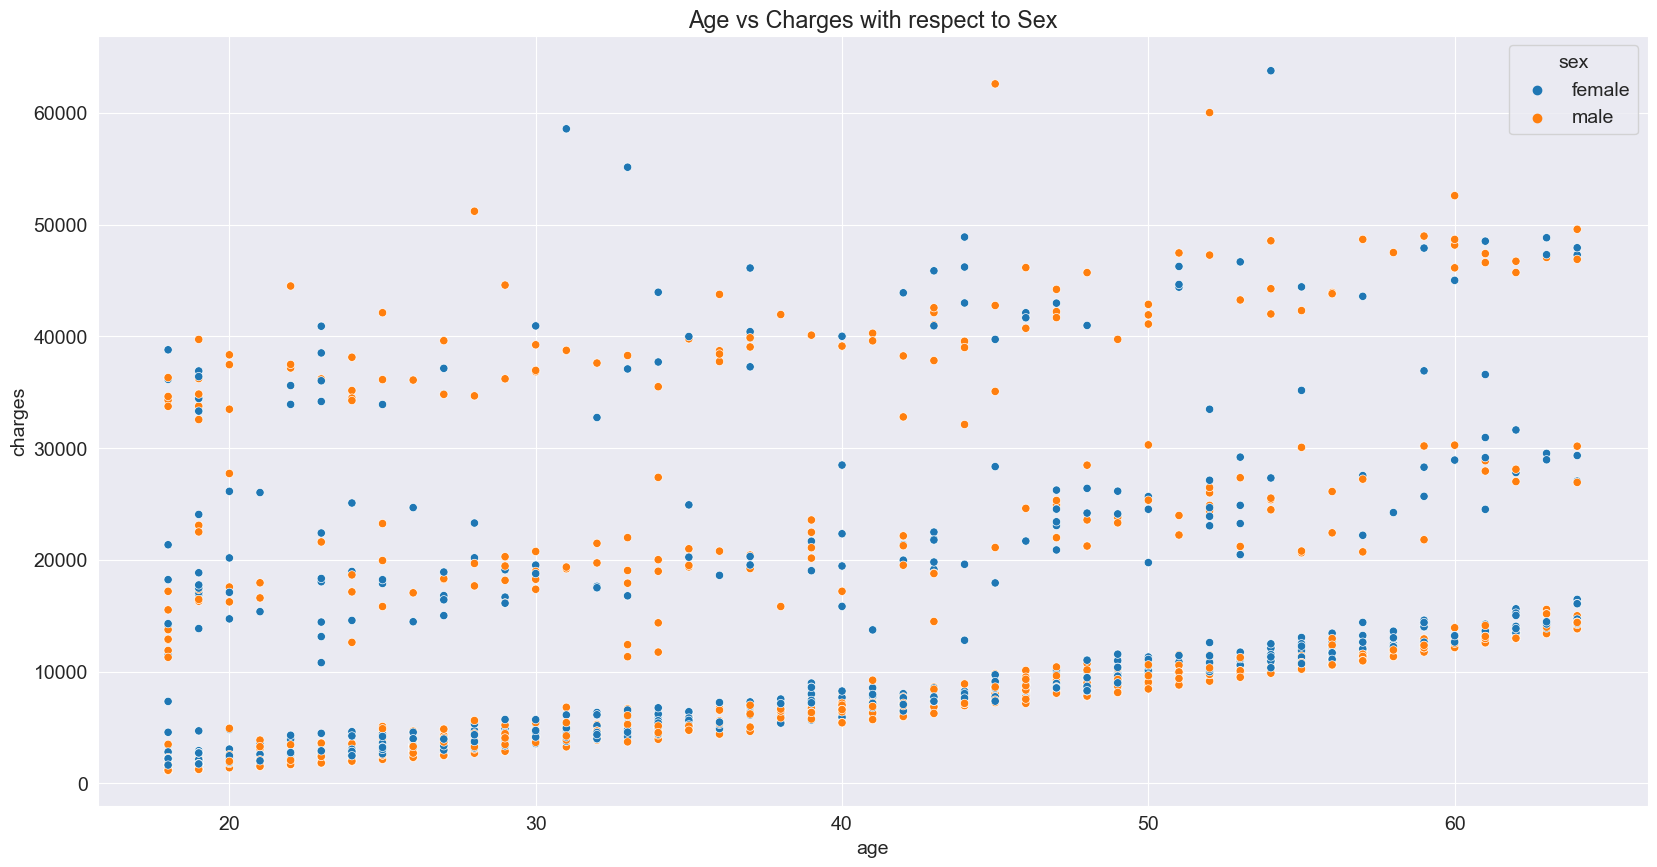

In [30]:
# Plotting a scatterplot for 'age' vs 'charges' with respect to 'sex'
sns.scatterplot(x = 'age', y = 'charges', hue = 'sex', data = train_df).set(title = "Age vs Charges with respect to Sex");

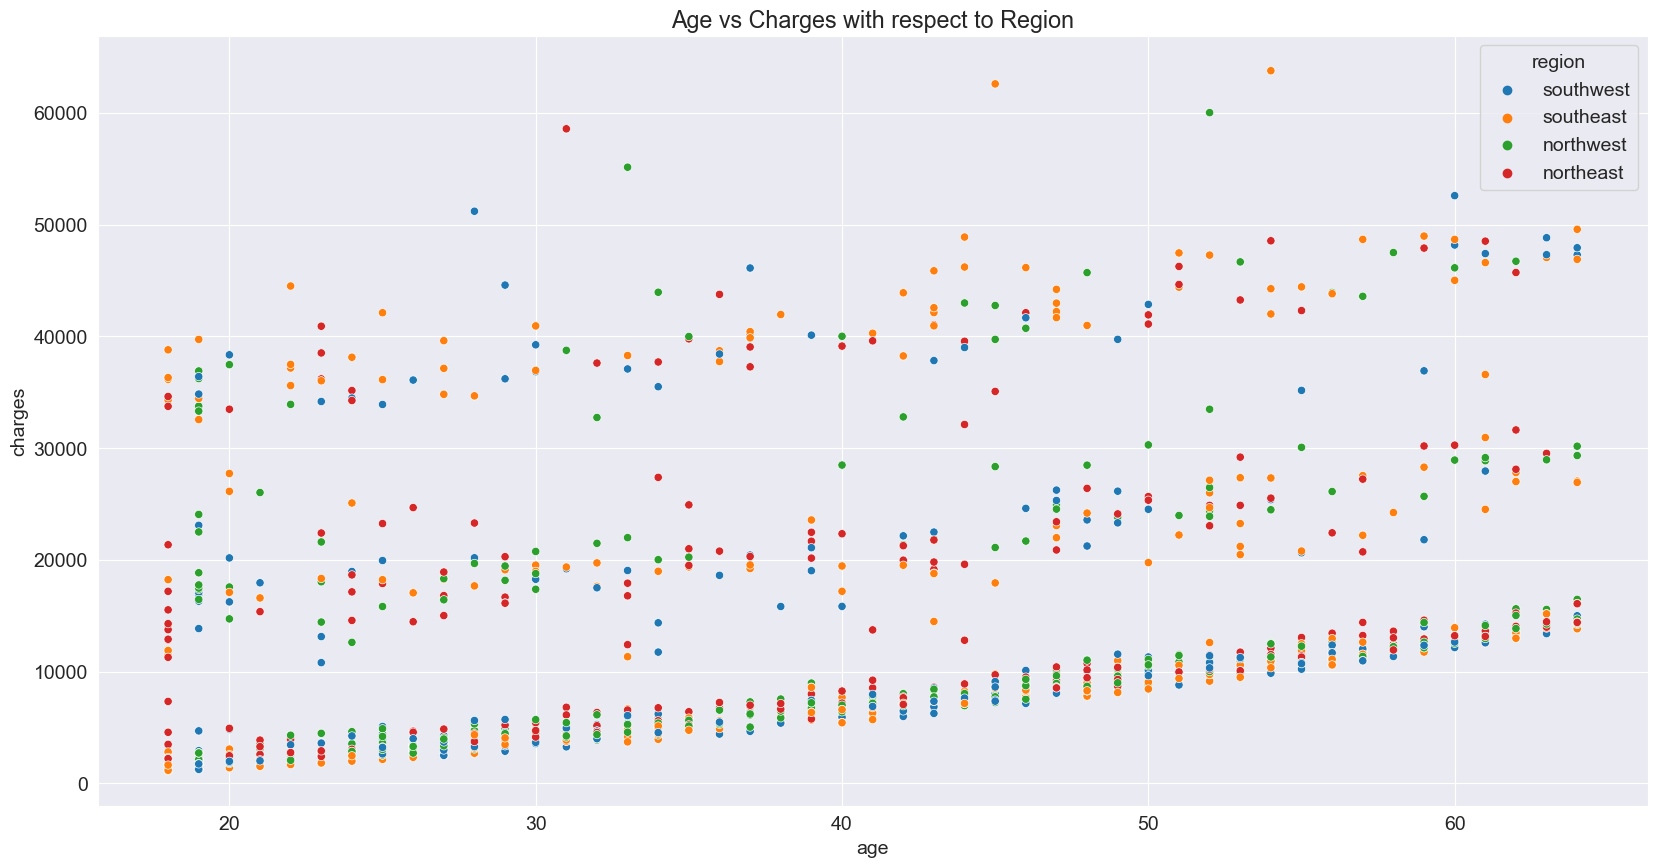

In [31]:
# Plotting a scatterplot for 'age' vs 'charges' with respect to 'region'
sns.scatterplot(x = 'age', y = 'charges', hue = 'region', data = train_df).set(title = "Age vs Charges with respect to Region");

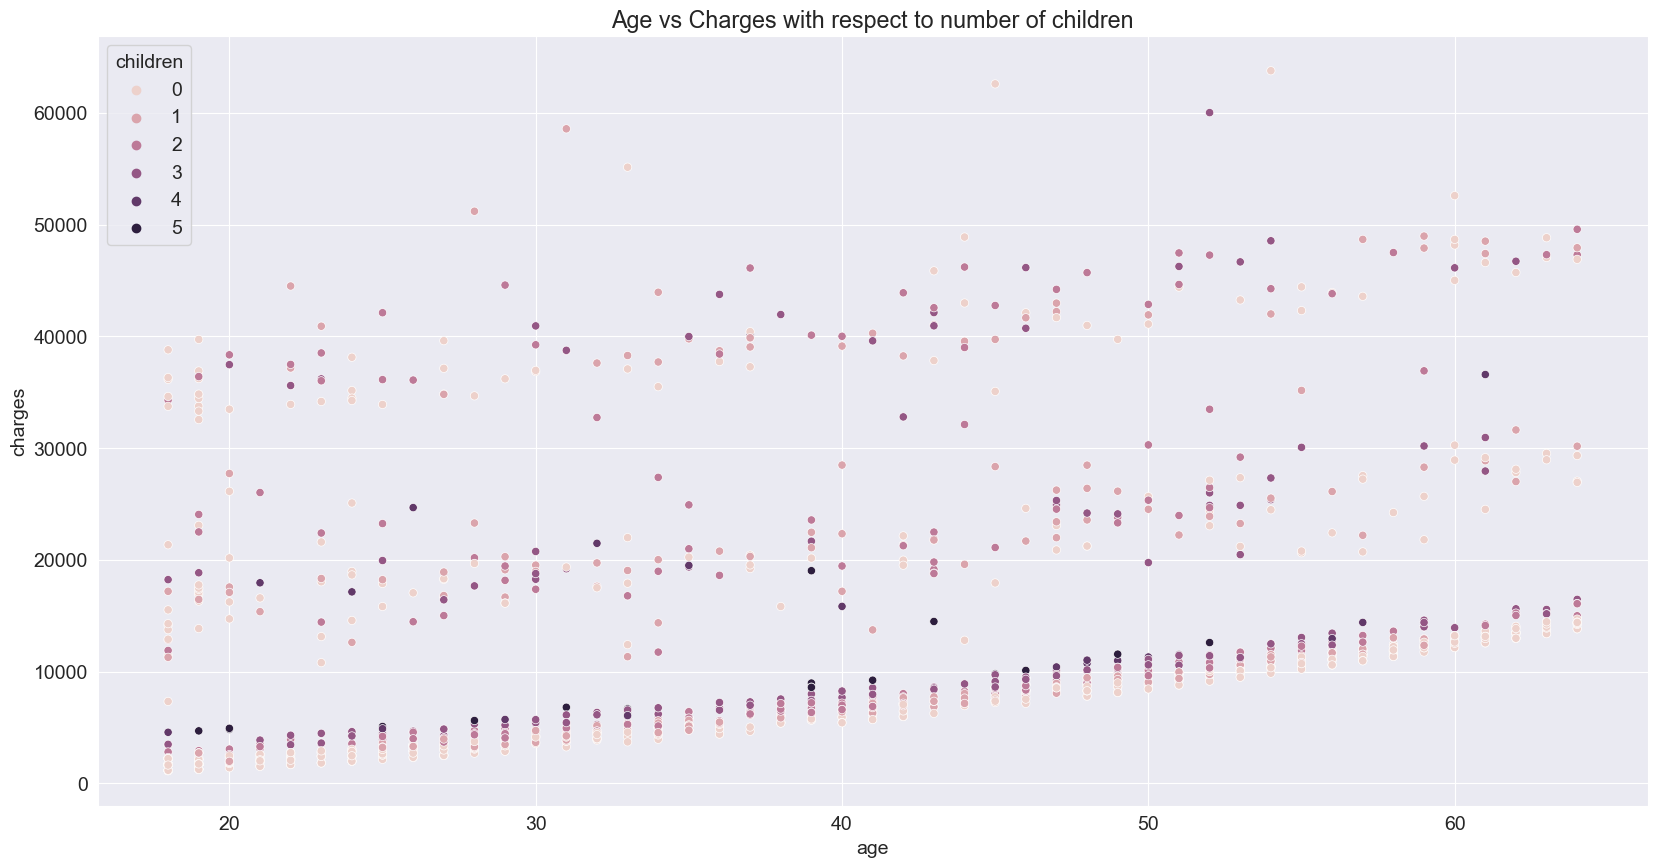

In [32]:
# Plotting a scatterplot for 'age' vs 'charges' with respect to 'children'
sns.scatterplot(x = 'age', y = 'charges', hue = 'children', data = train_df).set(title = "Age vs Charges with respect to number of children");

## Correlation Matrix

In [33]:
# Calculating correlation matrix
train_df.corr()

C:\Users\D3675166\AppData\Local\Temp\ipykernel_8900\1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\D3675166\AppData\Local\Temp\ipykernel_8900\3584469444.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), cmap='Reds', annot=True)


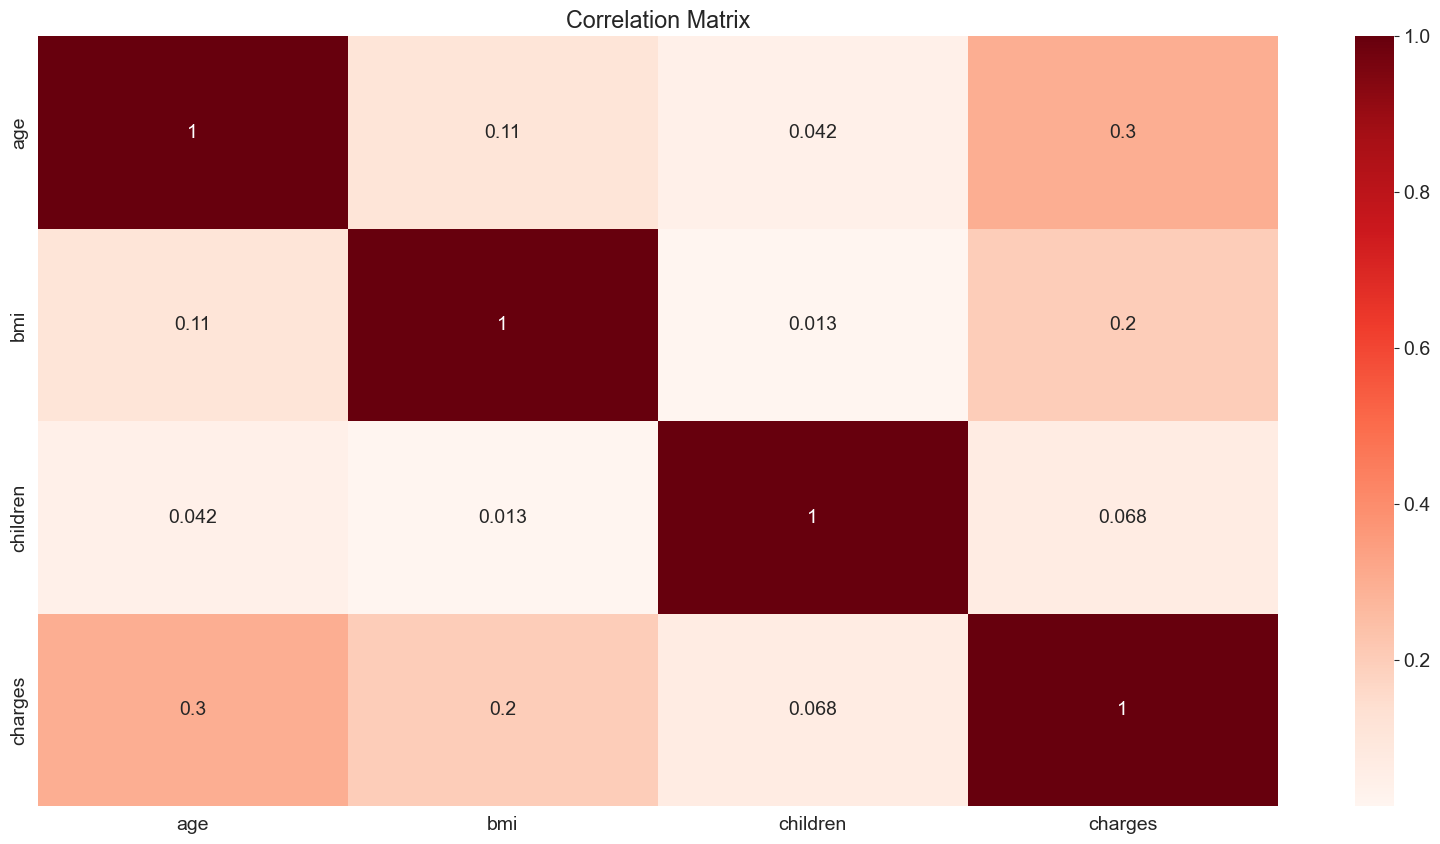

In [34]:
# Plotting a heatmap for correlation matrix
sns.heatmap(train_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

###### Upon examination, there is a strong positive correlation between age and charges, indicating that older individuals tend to incur higher insurance costs compared to younger individuals. This suggests that age is a significant factor influencing insurance expenditure.

## Preprocessing and Feature Engineering

### Imputing the null values

In [35]:
# Checking for missing values again
train_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### Since there are no null values, we can simply skip the process of imputing.

### Encoding Categorical Columns using OneHot Encoder

In [36]:
# Displaying categorical columns
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_df[categorical_cols])

In [38]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
encoded_cols

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [39]:
# Encoding categorical columns
train_df[encoded_cols] = encoder.transform(train_df[categorical_cols])

In [40]:
# Dropping original categorical columns
train_df.drop(columns=categorical_cols,axis = 1, inplace = True)

In [41]:
# Displaying the updated dataset
train_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Removing Duplicate Values/Rows

In [42]:
# Removing duplicate rows
train_df.drop_duplicates(inplace = True)

## Preparing Training , Testing and Validation  Data Set

In [43]:
# Feature Matrix
X = train_df.drop('charges',axis = 1)

# Response/Target Vector
y = train_df.charges

In [44]:
X.shape,y.shape

((1337, 11), (1337,))

In [45]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.20)

In [46]:
# Further splitting the training set into training and validation sets
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.25)

In [47]:
# Displaying shapes of the training, validation, and testing sets
X_train.shape,y_train.shape

((801, 11), (801,))

In [48]:
X_val.shape,y_val.shape

((268, 11), (268,))

In [49]:
X_test.shape,y_test.shape

((268, 11), (268,))

## Training the Regression Models


KNN Regressor: This model predicts the target variable by averaging the target values of the k-nearest neighbours found in the training set.

Linear Regression: A basic yet effective model that establishes a linear relationship between the input features and the target variable.

Decision Tree: A tree-based model that makes decisions by splitting the data into subsets based on the values of features.

Random Forest: An ensemble method that constructs multiple decision trees and outputs the average prediction of individual trees, providing improved accuracy and robustness.

## 1. KNN Regressor Model

### 1.1 Training the KNN Model

In [50]:
# importing the KNN model
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor(n_neighbors = 5,weights = 'uniform',leaf_size = 30)  # Instantiating the default KNeighborsClassifier class

In [51]:
Knn.fit(X_train,y_train)

KNeighborsRegressor()

In [52]:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

KNeighborsRegressor()

In [53]:
# Predictions
train_pred = Knn.predict(X_train)

In [54]:
validation_pred = Knn.predict(X_val)

#### 1.2 Loss Function For KNN model

###### 1.2.1 Mean Absolute Error

In [55]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,train_pred)

5476.452237992509

##### 1.2.2 Mean Squared Error

In [56]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_pred)

72062694.28870577

##### 1.2.3 Root Mean Squared Error

In [57]:
np.sqrt(mean_squared_error(y_train,train_pred))

8488.974866773124

We will be using Root Mean Squared Error to calculate loss for our models from now on.

In [58]:
# for training data
np.sqrt(mean_squared_error(y_train,train_pred))

8488.974866773124

In [59]:
# for validation data
np.sqrt(mean_squared_error(y_val,validation_pred))

9857.541844989355

We can see that our loss for testing data is approximately 8339 but on valiadation data, our model has approximately 
 9862 of RMSE. We can improve our model by Tuning the hyperparameters.

#### Tuning the Hyperparameters for KNNRegressor Model

We will mainly tune the following hypperparameters for our KNN model:

n_neighbors

weights

leaf_size

#### Tuning the n_neighbors Hyperparameter

In [60]:
%%time 

# by default n_neighbors or k == 5
training_errors = []
validation_errors = []

for i in range(1,30):
  Knn = KNeighborsRegressor(n_neighbors = i,weights = 'uniform',leaf_size = 30, n_jobs = -1)
  Knn.fit(X_train,y_train)
  training_errors.append(np.sqrt(mean_squared_error(y_train,Knn.predict(X_train))))
  validation_errors.append(np.sqrt(mean_squared_error(y_val,Knn.predict(X_val))))

CPU times: total: 625 ms
Wall time: 496 ms


In [61]:
print('When n_neighbors = '+str(training_errors.index(min(training_errors))+1)+" ,the minimum RMSE training error = "+str(min(training_errors)))

When n_neighbors = 1 ,the minimum RMSE training error = 0.0


In [62]:
print('When n_neighbors = '+str(validation_errors.index(min(validation_errors))+1)+" ,the minimum RMSE validation error = "+str(min(validation_errors)))

When n_neighbors = 11 ,the minimum RMSE validation error = 9789.749380523393


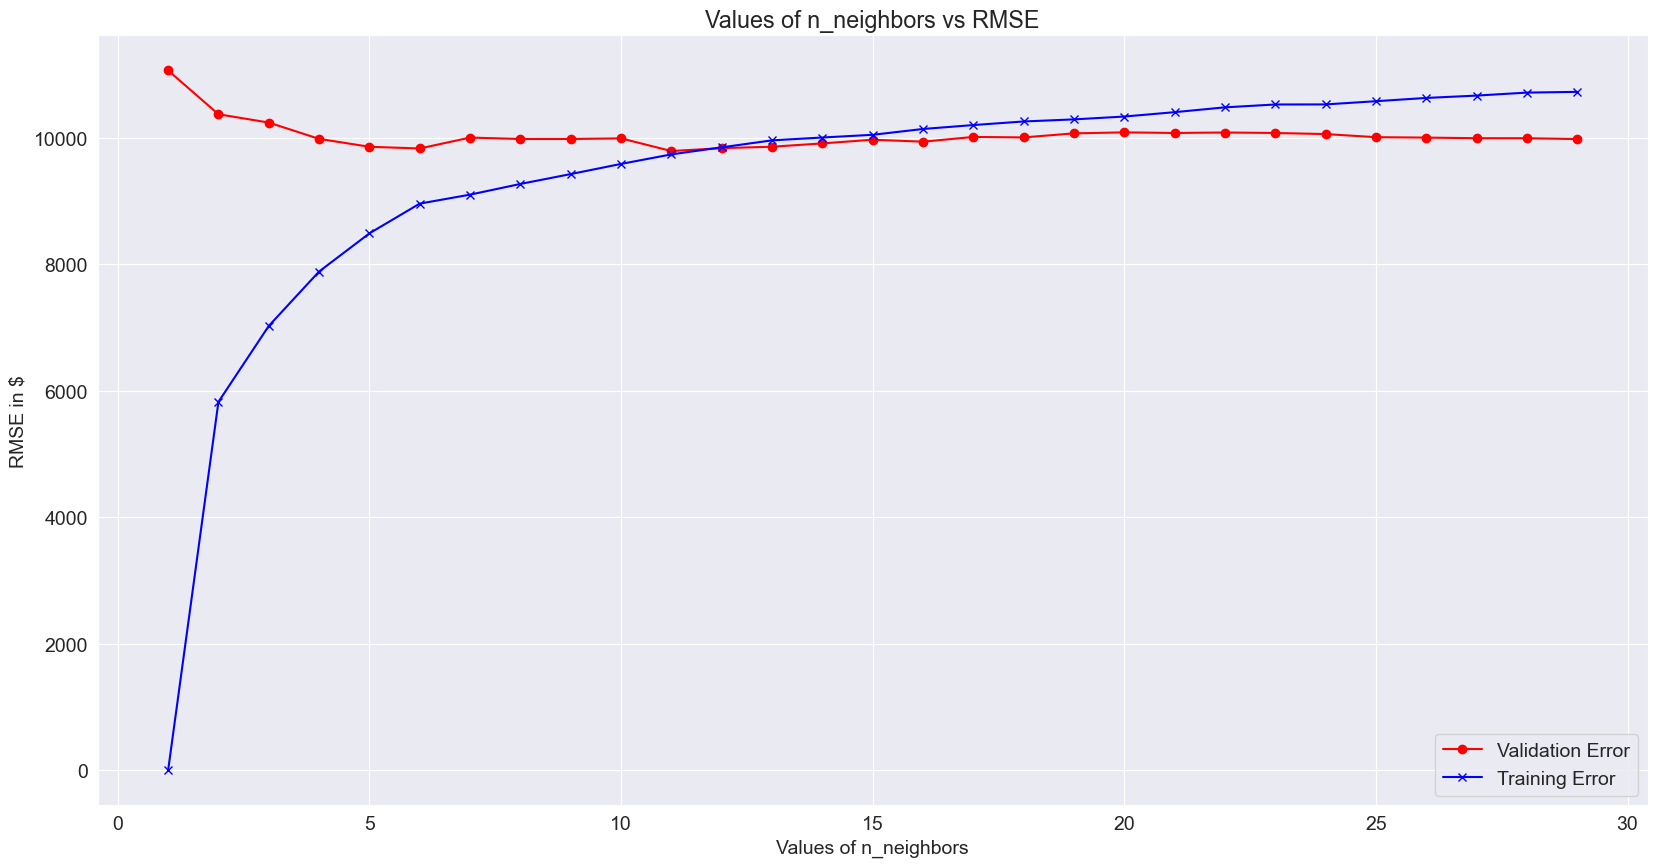

In [63]:
# Plotting in graph: Values of n_neighbors vs RMSE Error
plt.plot(range(1,30),validation_errors, color = 'red', marker = 'o')
plt.plot(range(1,30), training_errors, color = 'blue', marker = 'x')
plt.xlabel('Values of n_neighbors')
plt.ylabel('RMSE in $')
plt.title('Values of n_neighbors vs RMSE')
plt.legend(['Validation Error','Training Error']);

We can clearly see that our Knn model is overfitting with the training data when k = 1, and k = 2. Furthermore, the model has significantly higher RMSE when n_neighbors is increasing on training data. However, our model is performing better when n_neighbors = 11 on the validation set. Thus, we will tune our model that way.

In [64]:
# Tuned Model
Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = 30).fit(X_train,y_train)

#### Tuning the Weights Hyperparameter

In [65]:
Knn = KNeighborsRegressor(n_neighbors = 11,weights = 'uniform',leaf_size = 30, n_jobs = -1)
Knn.fit(X_train,y_train)

Knn1 = KNeighborsRegressor(n_neighbors = 11,weights = 'distance',leaf_size = 30, n_jobs = -1).fit(X_train,y_train)

In [66]:
dict1 = {'Models':['Tuned Validation Error','Tuned Training Error','Untuned Validation Error','Untuned Training Error'],'Error':[np.sqrt(mean_squared_error(y_val,Knn1.predict(X_val))),np.sqrt(mean_squared_error(y_train,Knn1.predict(X_train))),np.sqrt(mean_squared_error(y_val,Knn.predict(X_val))),np.sqrt(mean_squared_error(y_train,Knn.predict(X_train)))]}

In [67]:
tuned_df = pd.DataFrame(dict1) #.reset_index()
tuned_df['Bool'] = [True,False,True,False]
tuned_df

,Models,Error,Bool
0,Tuned Validation Error,9598.995794,True
1,Tuned Training Error,0.000000,False
2,Untuned Validation Error,9789.749381,True
3,Untuned Training Error,9737.029926,False


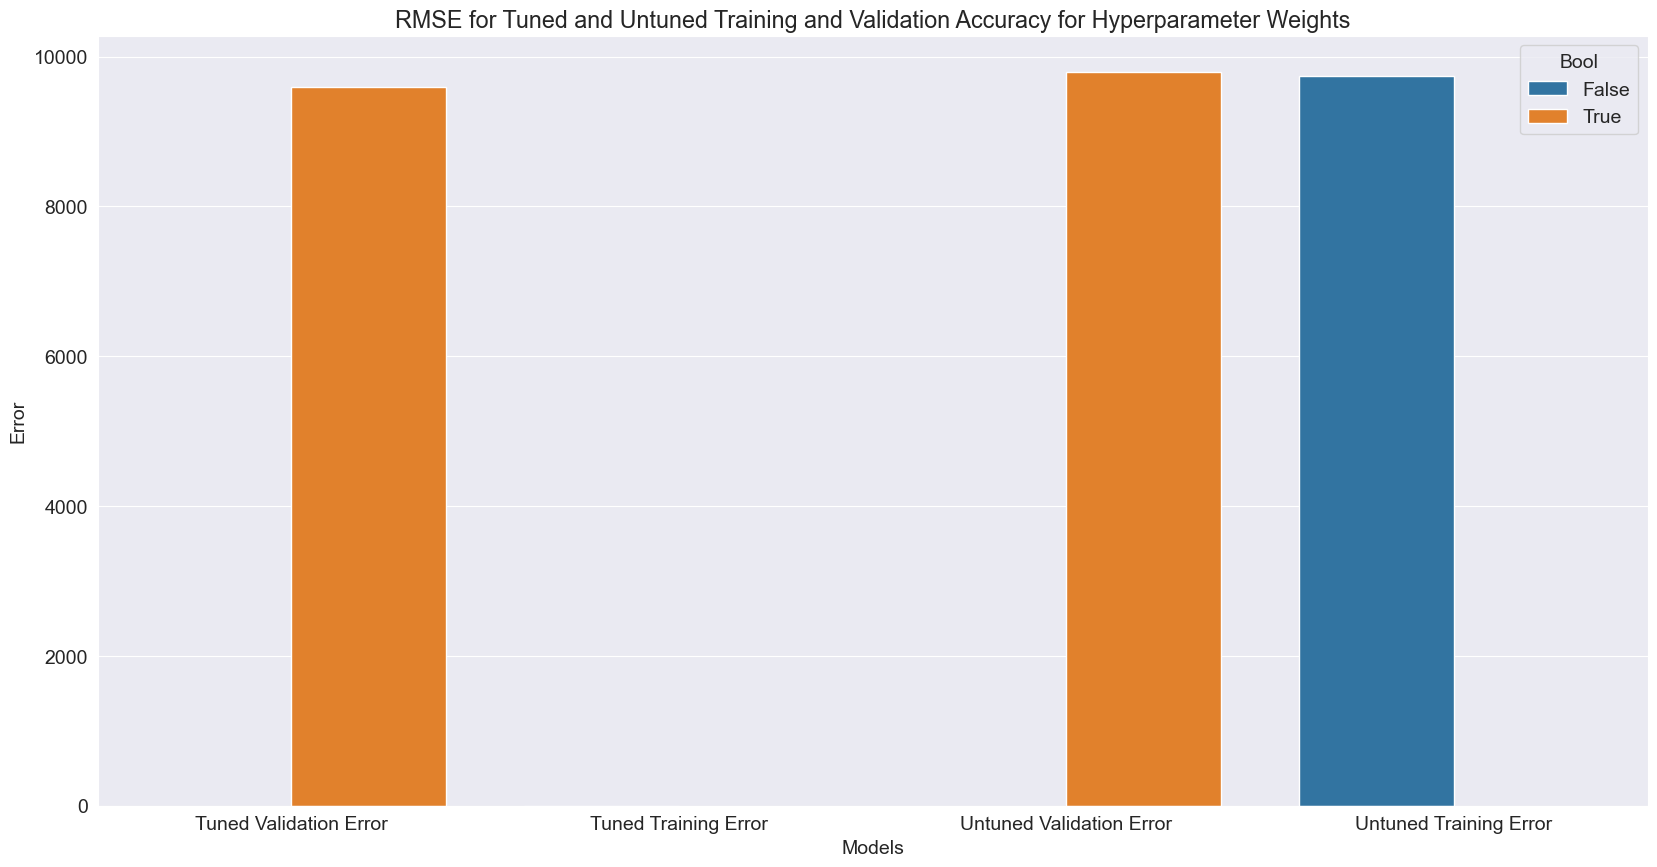

In [68]:
sns.barplot(x = 'Models', y ='Error', data = tuned_df, hue = 'Bool').set(title = 'RMSE for Tuned and Untuned Training and Validation Accuracy for Hyperparameter Weights');

It looks like it is best if we leave the weights hyperparameter to its default value.

In [69]:
# Tuned Model
Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = 30).fit(X_train,y_train)

#### Tuning Leaf Size Hyperparameter

In [70]:
leaf_size_values = [5,10] + list(range(25,325,25))

training_errors = []
validation_errors = []

for i in leaf_size_values:
  Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = i).fit(X_train,y_train)
  training_errors.append(np.sqrt(mean_squared_error(y_train,Knn.predict(X_train))))
  validation_errors.append(np.sqrt(mean_squared_error(y_val,Knn.predict(X_val))))

In [71]:
print('When leaf_size = '+str(leaf_size_values[(training_errors.index(min(training_errors))+1)])+" ,the minimum RMSE training error = "+str(min(training_errors)))

When leaf_size = 25 ,the minimum RMSE training error = 9734.174422094957


In [72]:
print('When leaf_size = '+str(leaf_size_values[(validation_errors.index(min(validation_errors))+1)])+" ,the minimum RMSE Validation error = "+str(min(validation_errors)))

When leaf_size = 25 ,the minimum RMSE Validation error = 9789.207277552217


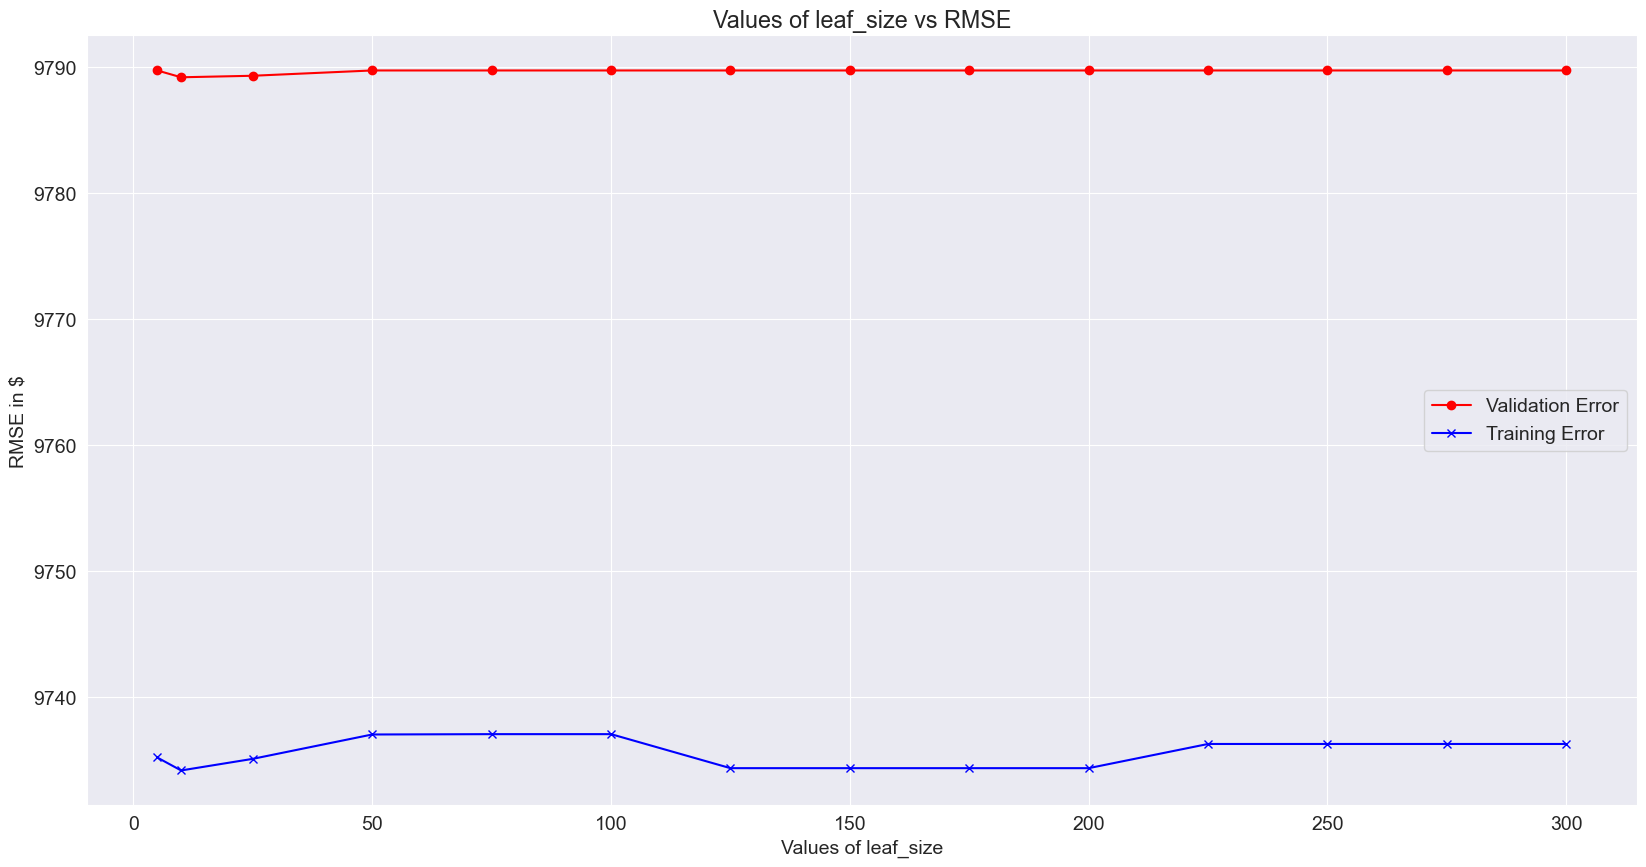

In [73]:
# Plotting in graph: Values of leaf_size vs RMSE Error
plt.plot(leaf_size_values,validation_errors, color = 'red', marker = 'o')
plt.plot(leaf_size_values, training_errors, color = 'blue', marker = 'x')
plt.xlabel('Values of leaf_size')
plt.ylabel('RMSE in $')
plt.title('Values of leaf_size vs RMSE')
plt.legend(['Validation Error','Training Error']);

We will tune our model such that leaf_size = 10

In [74]:
# Best Optimized Knn Regrssor Model
Knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 11, weights = 'uniform', leaf_size = 10).fit(X_train,y_train)

### Making Predictions on Testing Data

In [75]:
test_pred = Knn.predict(X_test)


In [76]:
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  12150.095942764628


The RMSE calculated is very high, meaning that our model has performed very poorly on the testing data. Thus, we will train our model using other regression models to achieve better accuracy and reduce loss/error.

## 2. Linear Regression Model

### 2.1 Training the Linear Regression Model


In [77]:
# training our default linear regression model
from sklearn.linear_model import LinearRegression
log_reg = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [78]:
# making predictions on training data
train_pred = log_reg.predict(X_train)

In [79]:
# Making Predictions on validation data
validation_pred = log_reg.predict(X_val)

In [80]:
# Lets see the coefficients for our selected features
log_reg.coef_

array([   242.91567173,    310.52268855,    509.39235351,     33.01681167,
          -33.01681167, -11600.54467957,  11600.54467957,    497.62789924,
         -154.9785801 ,   -278.29620092,    -64.35311822])

In [81]:
# Lets see the y_intercept of the model
log_reg.intercept_

329.84592864617844

In [82]:
log_reg.normalize

False

In [83]:
log_reg.fit_intercept

True

### 2.2 Loss Function For Linear Regression Model


In [84]:
# RMSE For Training Predictions
rmse_train = np.sqrt(mean_squared_error(y_train,train_pred))
rmse_train

6175.140706590151

In [85]:
# RMSE for Validation Predictions
rmse_val = np.sqrt(mean_squared_error(y_val,validation_pred))
rmse_val

5806.051653867959

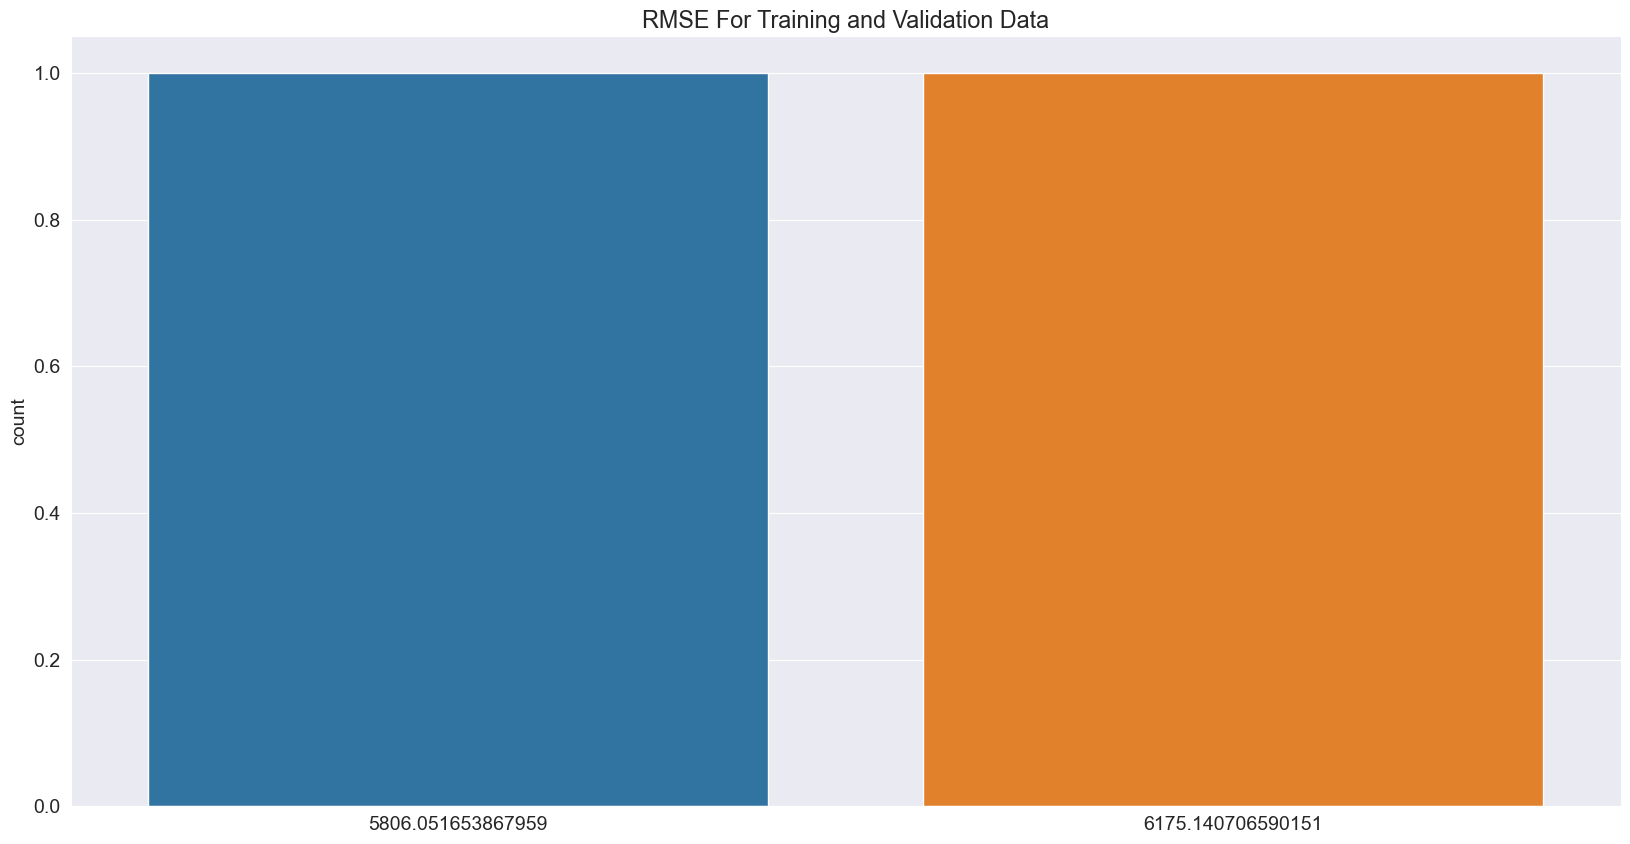

In [86]:
sns.countplot(x = [rmse_train,rmse_val]).set(title = 'RMSE For Training and Validation Data');

### 2.3 Hyperparameter Tuning For Linear Regression Model

Hyperparameter tuning for a Linear Regression model involves optimizing normalize and fit_intercept:

Normalize: Determines whether to scale input features before fitting the model. Scaling can ensure equal feature contribution.

Fit_intercept: Decides whether to calculate the intercept for the regression equation. True (default) includes an intercept term; False assumes data is centered.

In [87]:
# Our original Model
log_reg = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


#### Tuning Hyperparameter normalize


In [88]:
# when normalize = False (default)
log_reg1 = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

rmse_train1 = np.sqrt(mean_squared_error(y_train, log_reg1.predict(X_train)))
rmse_val1 = np.sqrt(mean_squared_error(y_val, log_reg1.predict(X_val)))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [89]:
# when normalize = True
log_reg2 = LinearRegression(n_jobs = -1, normalize = True, fit_intercept = True).fit(X_train,y_train)

rmse_train2 = np.sqrt(mean_squared_error(y_train, log_reg2.predict(X_train)))
rmse_val2 = np.sqrt(mean_squared_error(y_val, log_reg2.predict(X_val)))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [90]:
dict1 = {
    'Models':['rmse_train1','rmse_train2','rmse_val1','rmse_val2'],
    'Values':[rmse_train1,rmse_train2,rmse_val1,rmse_val2],
    'Bool':[0,0,1,1]
}

tuned_df = pd.DataFrame(dict1)
tuned_df

,Models,Values,Bool
0,rmse_train1,6175.140707,0
1,rmse_train2,6180.302183,0
2,rmse_val1,5806.051654,1
3,rmse_val2,5806.228127,1


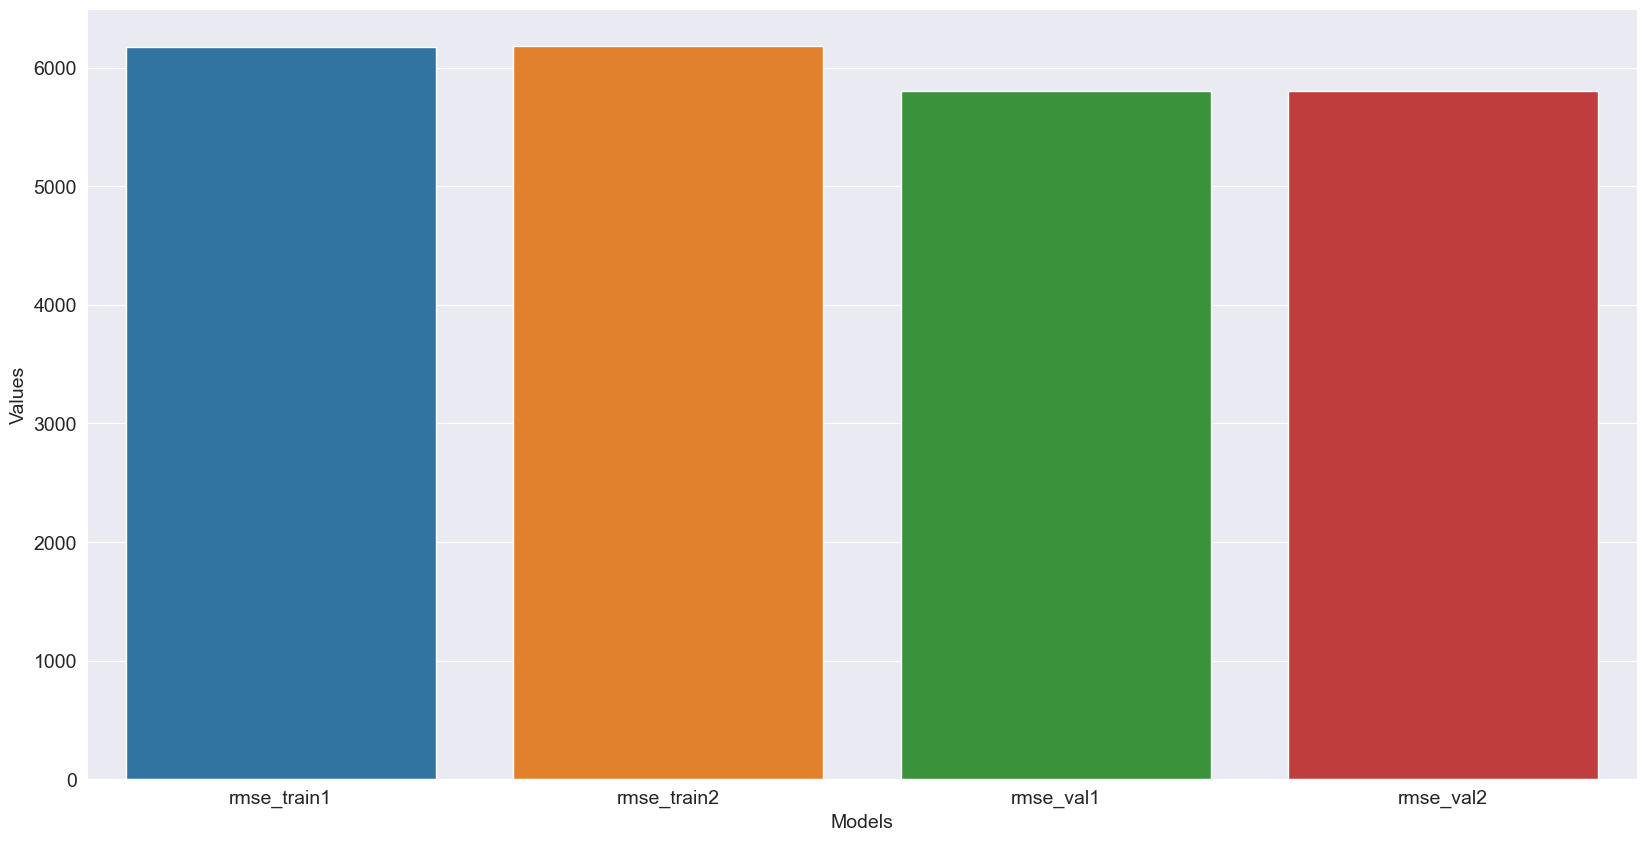

In [91]:
sns.barplot(data = tuned_df, x = 'Models',y = 'Values');

#### Tuning Hyperparameter fit_intercept

In [92]:
# when fit_intercept = True (default)
log_reg1 = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

rmse_train1 = np.sqrt(mean_squared_error(y_train, log_reg1.predict(X_train)))
rmse_val1 = np.sqrt(mean_squared_error(y_val, log_reg1.predict(X_val)))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [93]:
# when fit_intercept = False
log_reg2 = LinearRegression(n_jobs = -1, normalize = True, fit_intercept = False).fit(X_train,y_train)

rmse_train2 = np.sqrt(mean_squared_error(y_train, log_reg2.predict(X_train)))
rmse_val2 = np.sqrt(mean_squared_error(y_val, log_reg2.predict(X_val)))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [94]:
dict1 = {
    'Models':['rmse_train1','rmse_train2','rmse_val1','rmse_val2'],
    'Values':[rmse_train1,rmse_train2,rmse_val1,rmse_val2]
}

tuned_df = pd.DataFrame(dict1)
tuned_df

,Models,Values
0,rmse_train1,6175.140707
1,rmse_train2,6175.140707
2,rmse_val1,5806.051654
3,rmse_val2,5806.051654


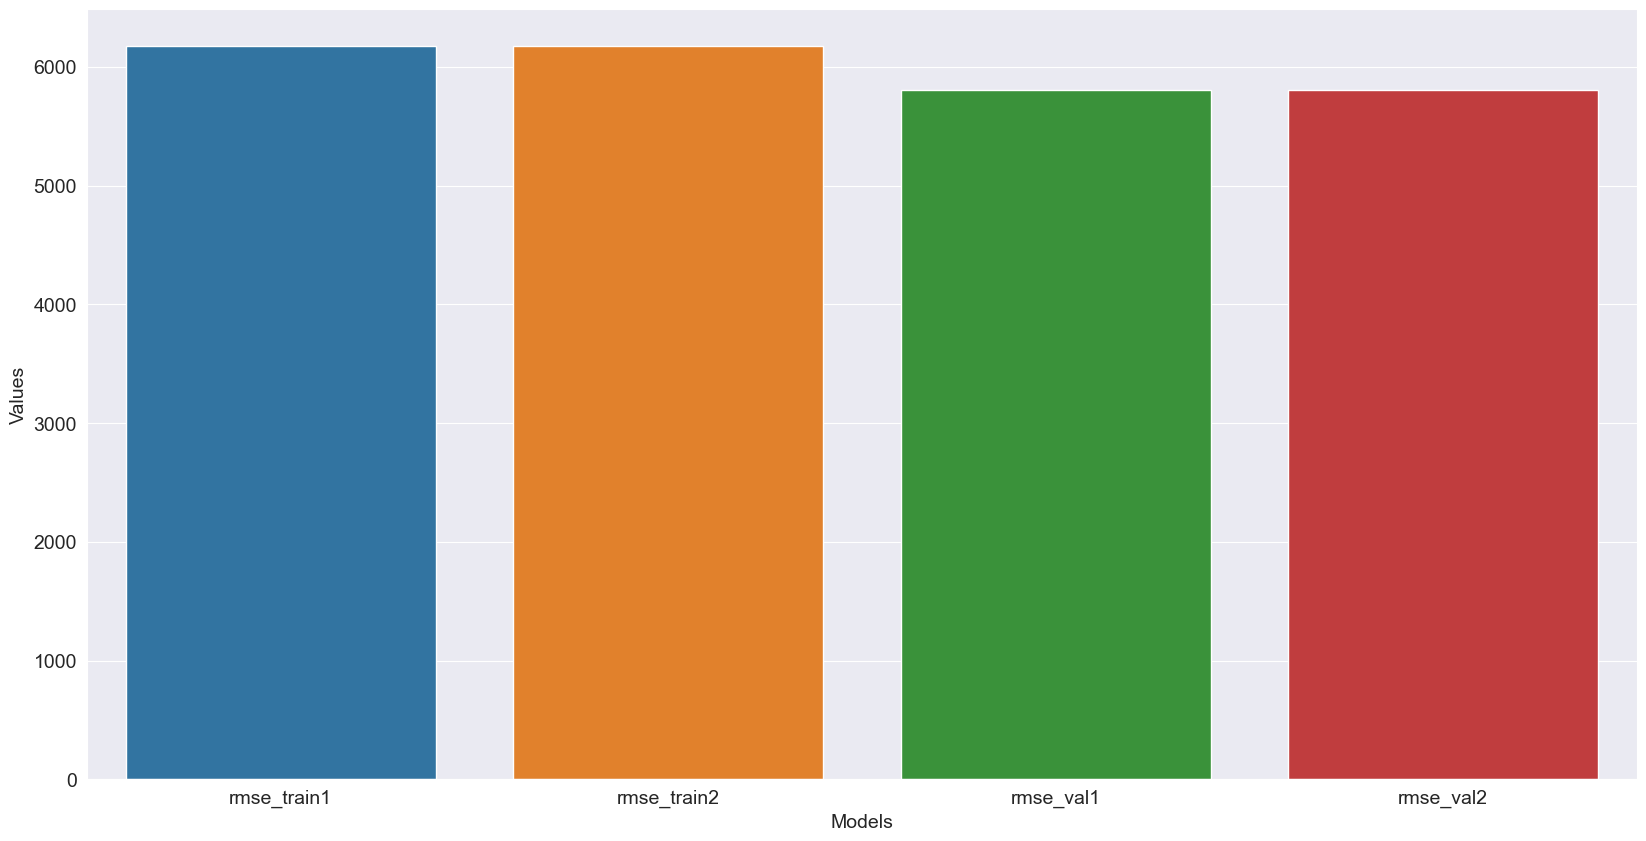

In [95]:
sns.barplot(data = tuned_df, x = 'Models',y = 'Values');

Well, it looks like the model is also unaffected with the change in value of this hyperparameter. Thus, we will use our default model to make predictions on the testing data, and compare the results with the results of the Knn Model.

### 2.4 Making Predictions on the Testing data with optimized Model

In [96]:
log_reg = LinearRegression(n_jobs = -1, normalize = False, fit_intercept = True).fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [97]:
test_pred = log_reg.predict(X_test)


In [98]:
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  5975.162654151709


This model is significantly better than Knn Model, as Knn Model has significantly higher RMSE on testing data.

## 3. Decision Tree Model

### 3.1 Training the Decision Tree Model

In [99]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 42, max_depth = None, max_leaf_nodes = None).fit(X_train,y_train)

In [100]:
train_pred = tree.predict(X_train)

In [101]:
validation_pred = tree.predict(X_val)

In [102]:
# RMSE For training data
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_train

0.0

In [103]:
# RMSE For Validation data
rmse_val = np.sqrt(mean_squared_error(y_val,validation_pred))
rmse_val

7061.111007738699

We can clearly see that our descision tree model has completely overfitted with the training data. Thus, in the next step, we will perform hyperparameter tuning to reduce overfitting on our model.

In [104]:
from sklearn.tree import plot_tree, export_text

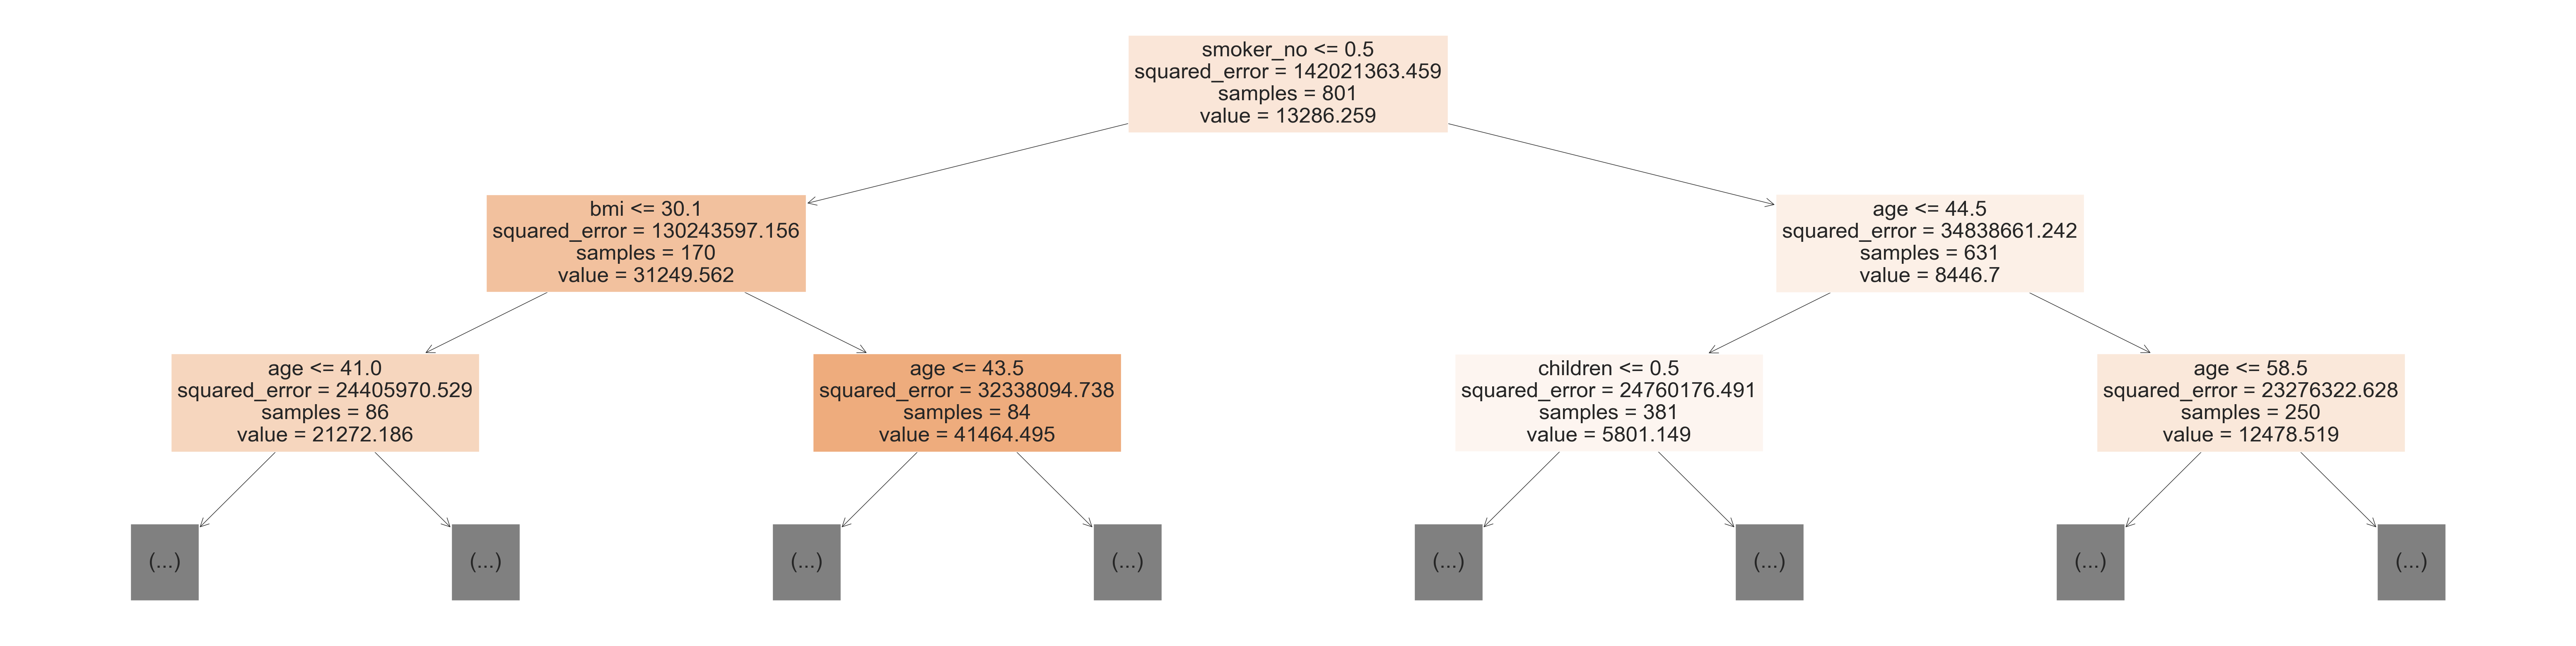

In [105]:
plt.figure(figsize=(80,20))
plot_tree(tree, feature_names = X_train.columns,filled = True, max_depth =2);

In [106]:
tree.tree_.max_depth

21

In [107]:
tree_text = export_text(tree, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- smoker_no <= 0.50
|   |--- bmi <= 30.10
|   |   |--- age <= 41.00
|   |   |   |--- bmi <= 28.49
|   |   |   |   |--- age <= 29.50
|   |   |   |   |   |--- bmi <= 21.73
|   |   |   |   |   |   |--- age <= 25.50
|   |   |   |   |   |   |   |--- bmi <= 18.91
|   |   |   |   |   |   |   |   |--- value: [12829.46]
|   |   |   |   |   |   |   |--- bmi >  18.91
|   |   |   |   |   |   |   |   |--- region_northeast <= 0.50
|   |   |   |   |   |   |   |   |   |--- value: [13844.51]
|   |   |   |   |   |   |   |   |--- region_northeast >  0.50
|   |   |   |   |   |   |   |   |   |--- bmi <= 21.09
|   |   |   |   |   |   |   |   |   |   |--- value: [14571.89]
|   |   |   |   |   |   |   |   |   |--- bmi >  21.09
|   |   |   |   |   |   |   |   |   |   |--- value: [14283.46]
|   |   |   |   |   |   |--- age >  25.50
|   |   |   |   |   |   |   |--- children <= 2.50
|   |   |   |   |   |   |   |   |--- value: [15006.58]
|   |   |   |   |   |   |   |--- children >  2.50
|   |   |   |   |   |   

In [108]:
# feature importances
tree.feature_importances_

array([0.12511735, 0.215621  , 0.02404527, 0.00363027, 0.00248821,
       0.61212244, 0.        , 0.00519117, 0.00231951, 0.00222747,
       0.00723731])

In [109]:
importances = {
    'Features':X_train.columns,
    'Weights':tree.feature_importances_
}

importances = pd.DataFrame(importances).sort_values('Weights', ascending = False)
importances

,Features,Weights
5,smoker_no,0.612122
1,bmi,0.215621
0,age,0.125117
2,children,0.024045
10,region_southwest,0.007237
7,region_northeast,0.005191
3,sex_female,0.003630
4,sex_male,0.002488
8,region_northwest,0.002320
9,region_southeast,0.002227


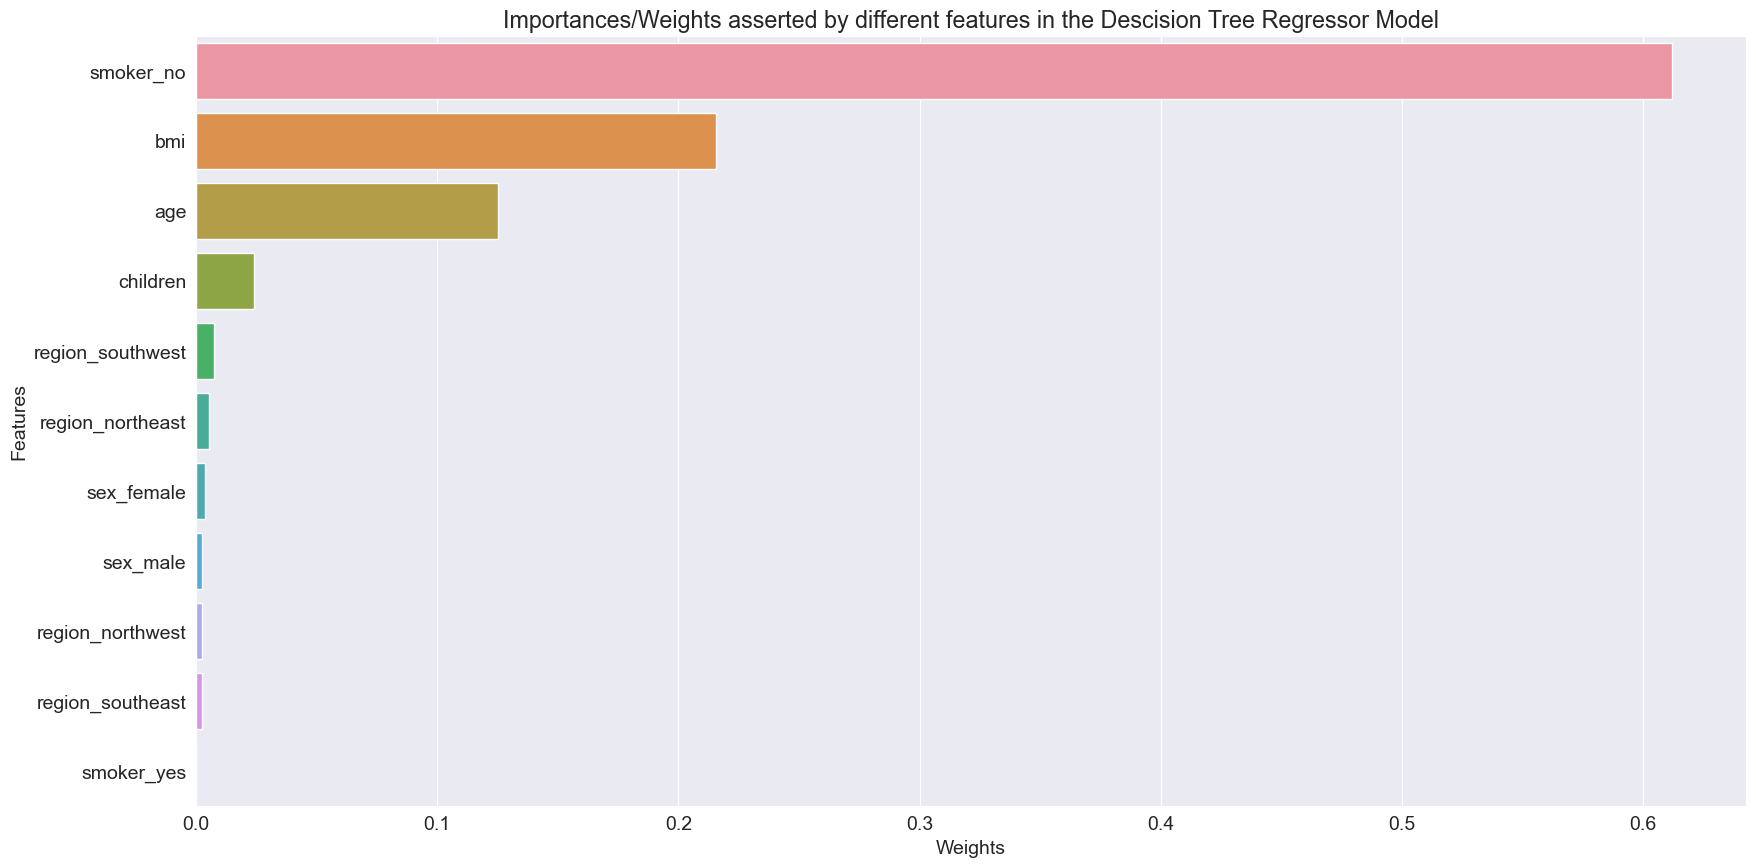

In [110]:
plt.title("Importances/Weights asserted by different features in the Descision Tree Regressor Model")
sns.barplot(x = 'Weights', y ='Features', data = importances);

We can see that our descision Tree model is mostly affected by the smoker_no column: It means the insurance cost is mostly affected if the person doesnot smoke.

### 3.2 Hyperperameter Tuning for Decision Tree model

We will be tuning the following Hyperparameters:

1. max_depth

2. max_leaf_nodes

#### Tuning the Hyperparameter max_depth

In [111]:
tree.tree_.max_depth

21

In [112]:
max_depth_values = list(range(2,31,2))

training_rmse = []
validation_rmse = []

In [113]:
for i in max_depth_values:
  tree = DecisionTreeRegressor(random_state = 42, max_depth = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,tree.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,tree.predict(X_val))))

In [114]:
errors_df = pd.DataFrame({
    'Max Depth':max_depth_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df

,Max Depth,Training RMSE,Validation RMSE
0,2,5005.368070,5304.116032
1,4,4245.907911,5162.837926
2,6,3700.884090,5569.913189
3,8,2855.273707,6232.854137
4,10,2015.891390,6308.415416
5,12,1296.125627,6717.714604
6,14,1010.536021,6804.291055
7,16,844.971543,6930.722264
8,18,355.677967,7078.730374
9,20,0.013197,6855.185105


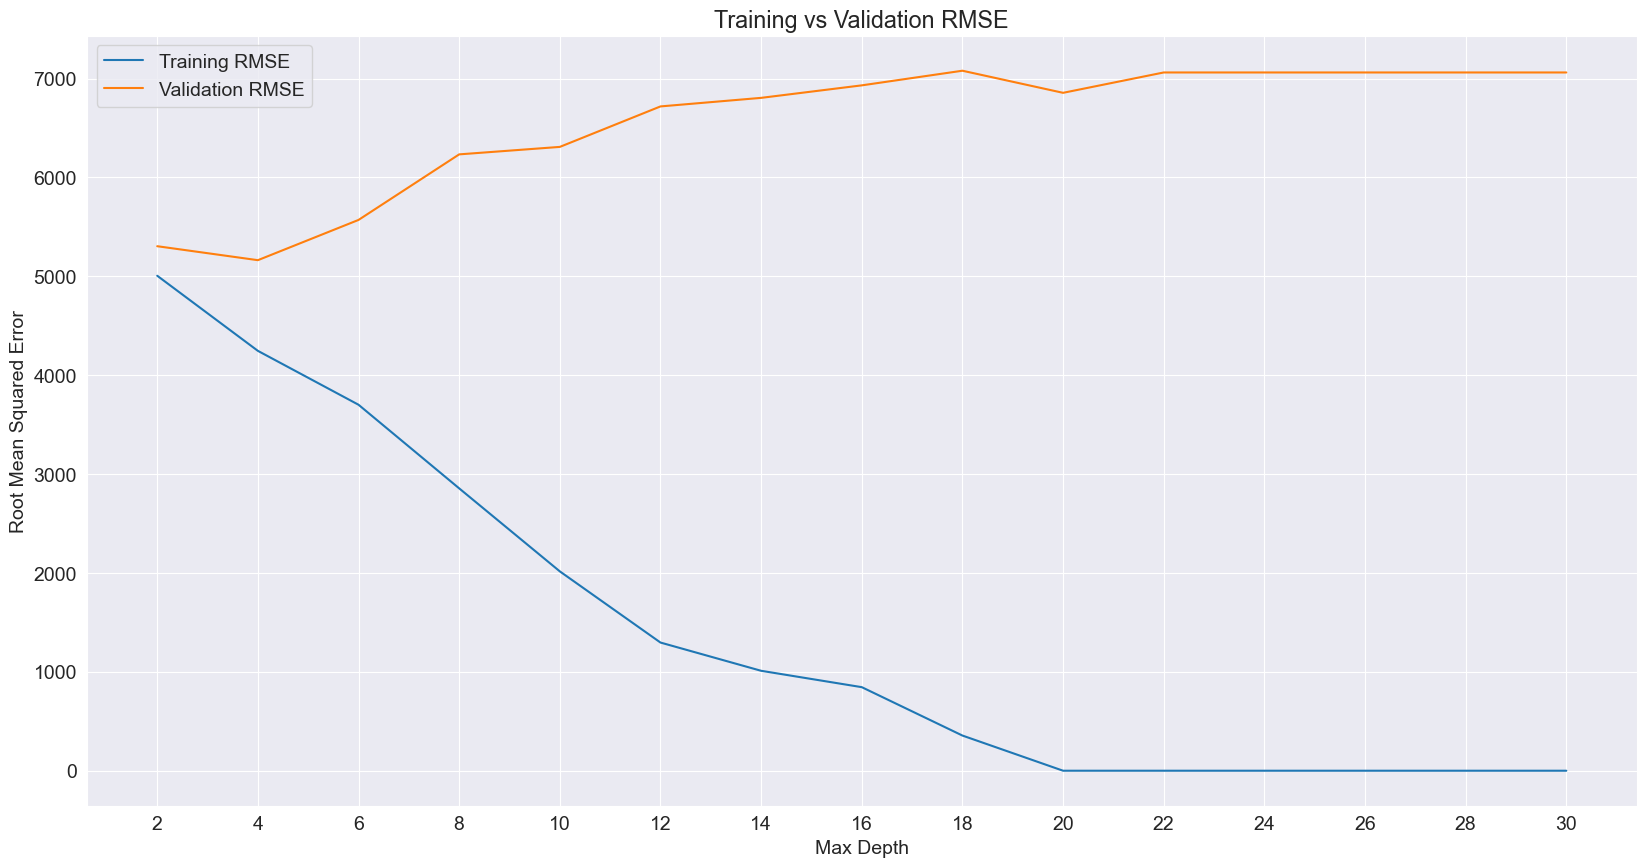

In [115]:
# plotting in graph
plt.title('Training vs Validation RMSE')
plt.xlabel('Max Depth')
plt.ylabel('Root Mean Squared Error')
plt.plot(errors_df['Max Depth'], errors_df["Training RMSE"])
plt.plot(errors_df['Max Depth'], errors_df["Validation RMSE"])
plt.xticks(max_depth_values)
plt.legend(['Training RMSE','Validation RMSE']);

We can see that our model performs best on validation set when max_depth = 4. It can also be seen that, with increase in max_depth's value, our model starts overfitting on the training data. Thus, we will tune our model with respect to model's efficiency in validation data.

In [116]:
tree = DecisionTreeRegressor(random_state = 42, max_depth = 4).fit(X_train,y_train)

### Tuning the Hyperparameter max_leaf_nodes

In [117]:
max_leaf_nodes_values = [2 ** i for i in range(1,11)]

training_rmse = []
validation_rmse = []

In [118]:
for i in max_leaf_nodes_values:
  tree = DecisionTreeRegressor(random_state = 42, max_depth = 4, max_leaf_nodes = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,tree.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,tree.predict(X_val))))

In [119]:
errors_df = pd.DataFrame({
    'Max_leaf_nodes':max_leaf_nodes_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df

,Max_leaf_nodes,Training RMSE,Validation RMSE
0,2,7422.054960,7363.338920
1,4,5005.368070,5304.116032
2,8,4533.121902,5083.089529
3,16,4245.907911,5162.837926
4,32,4245.907911,5162.837926
5,64,4245.907911,5162.837926
6,128,4245.907911,5162.837926
7,256,4245.907911,5162.837926
8,512,4245.907911,5162.837926
9,1024,4245.907911,5162.837926


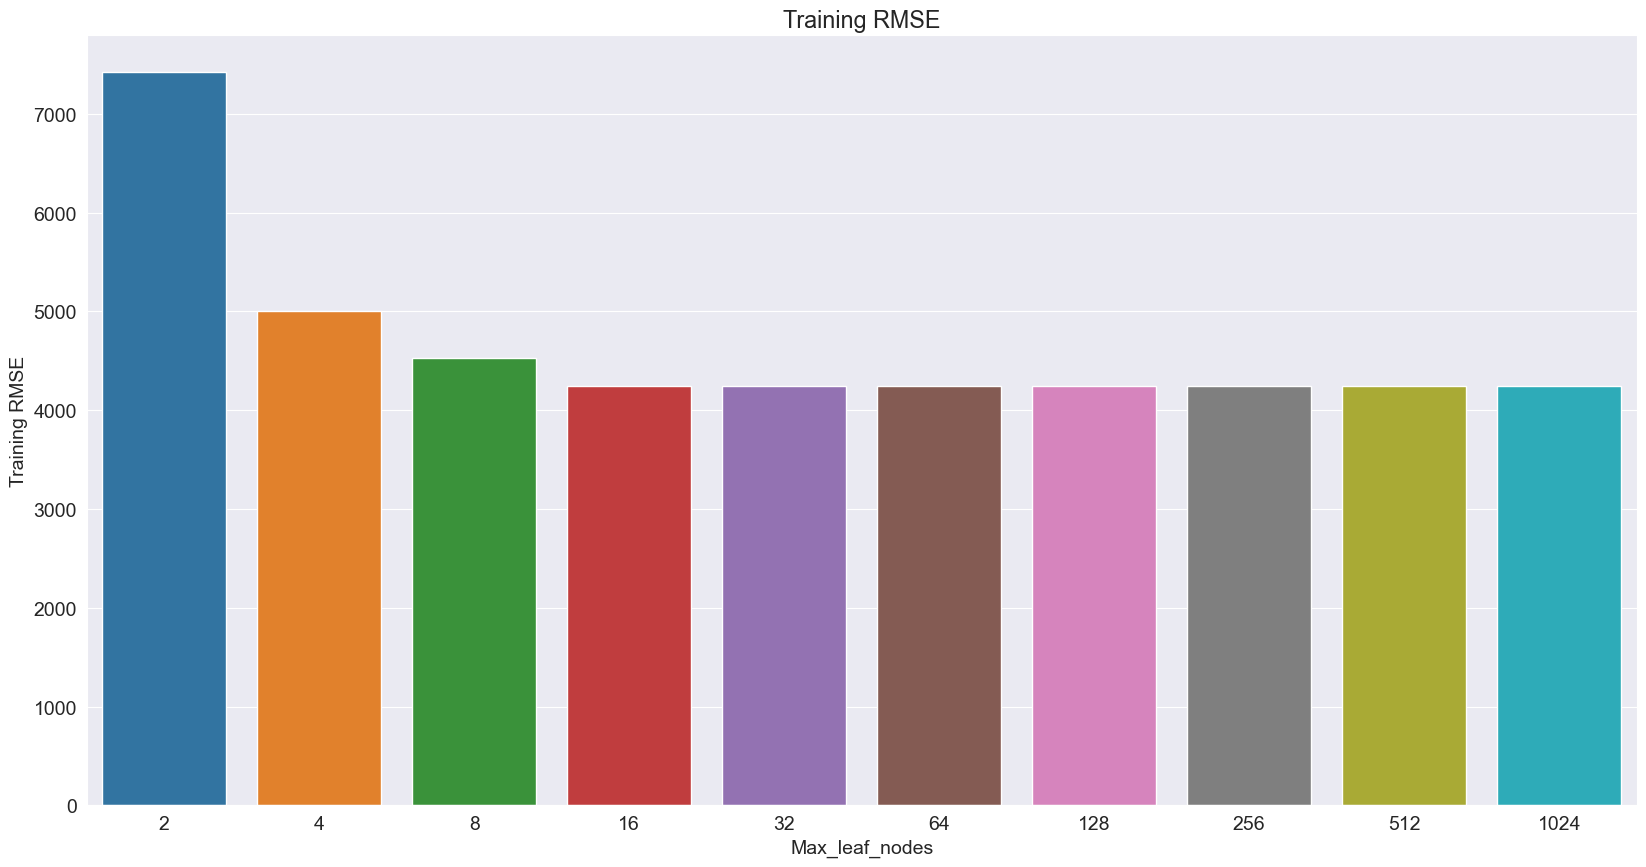

In [120]:
# plotting in graph
plt.title('Training RMSE')
sns.barplot(x = 'Max_leaf_nodes', y = 'Training RMSE', data = errors_df);

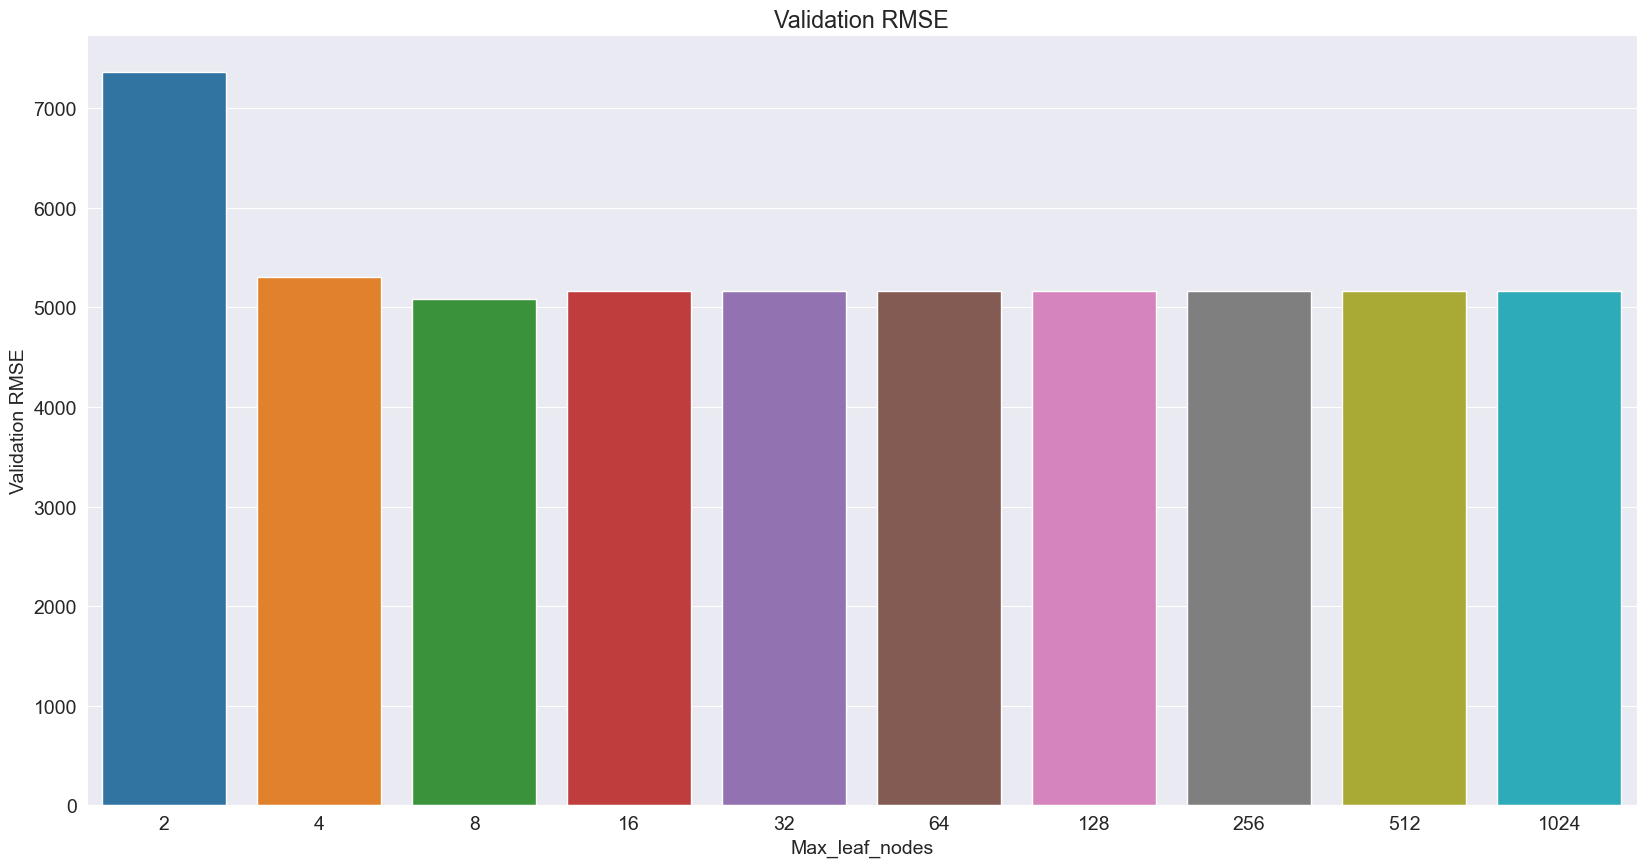

In [121]:
plt.title('Validation RMSE')
sns.barplot(x = 'Max_leaf_nodes', y = 'Validation RMSE', data = errors_df);

Our Model is performing best on both training and validation set when max_leaf_nodes = 8. Thus, we will tune our model that way

In [122]:
# Optimized Model
tree = DecisionTreeRegressor(max_leaf_nodes = 8 ,max_depth = 4, random_state = 42).fit(X_train,y_train)

### 3.3 Making Predictions on the Testing data with optimized Model

In [123]:
test_pred = tree.predict(X_test)

In [124]:
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  4485.311359605898


Our Decision Tree Regression model has performed even better than the Linear Regression model. However, we will still test our data with  additional models to see if we can get better results.

## 4 Random Forest Model

### 4.1 Training the Random Forest Regressor Model

In [125]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_jobs = -1, random_state = 42).fit(X_train,y_train)

In [126]:
train_pred = forest.predict(X_train)


In [127]:
validation_pred = forest.predict(X_val)


In [128]:
# RMSE For training data
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_train

1826.700920320225

In [129]:
rmse_val = np.sqrt(mean_squared_error(y_val,validation_pred))
rmse_val

5131.546792743694

There is a good possibility that our model is overfitting with the training data. Thus, we will perform Hyperparameter tuning in the next step.

By default, there are 100 descision trees in the random forest classifier model. i.e n_estimators = 100

In [130]:
# selecting the first descision tree
forest.estimators_[0]

DecisionTreeRegressor(max_features=1.0, random_state=1608637542)

In [131]:
# selecting the last descision tree
forest.estimators_[99]

DecisionTreeRegressor(max_features=1.0, random_state=134489564)

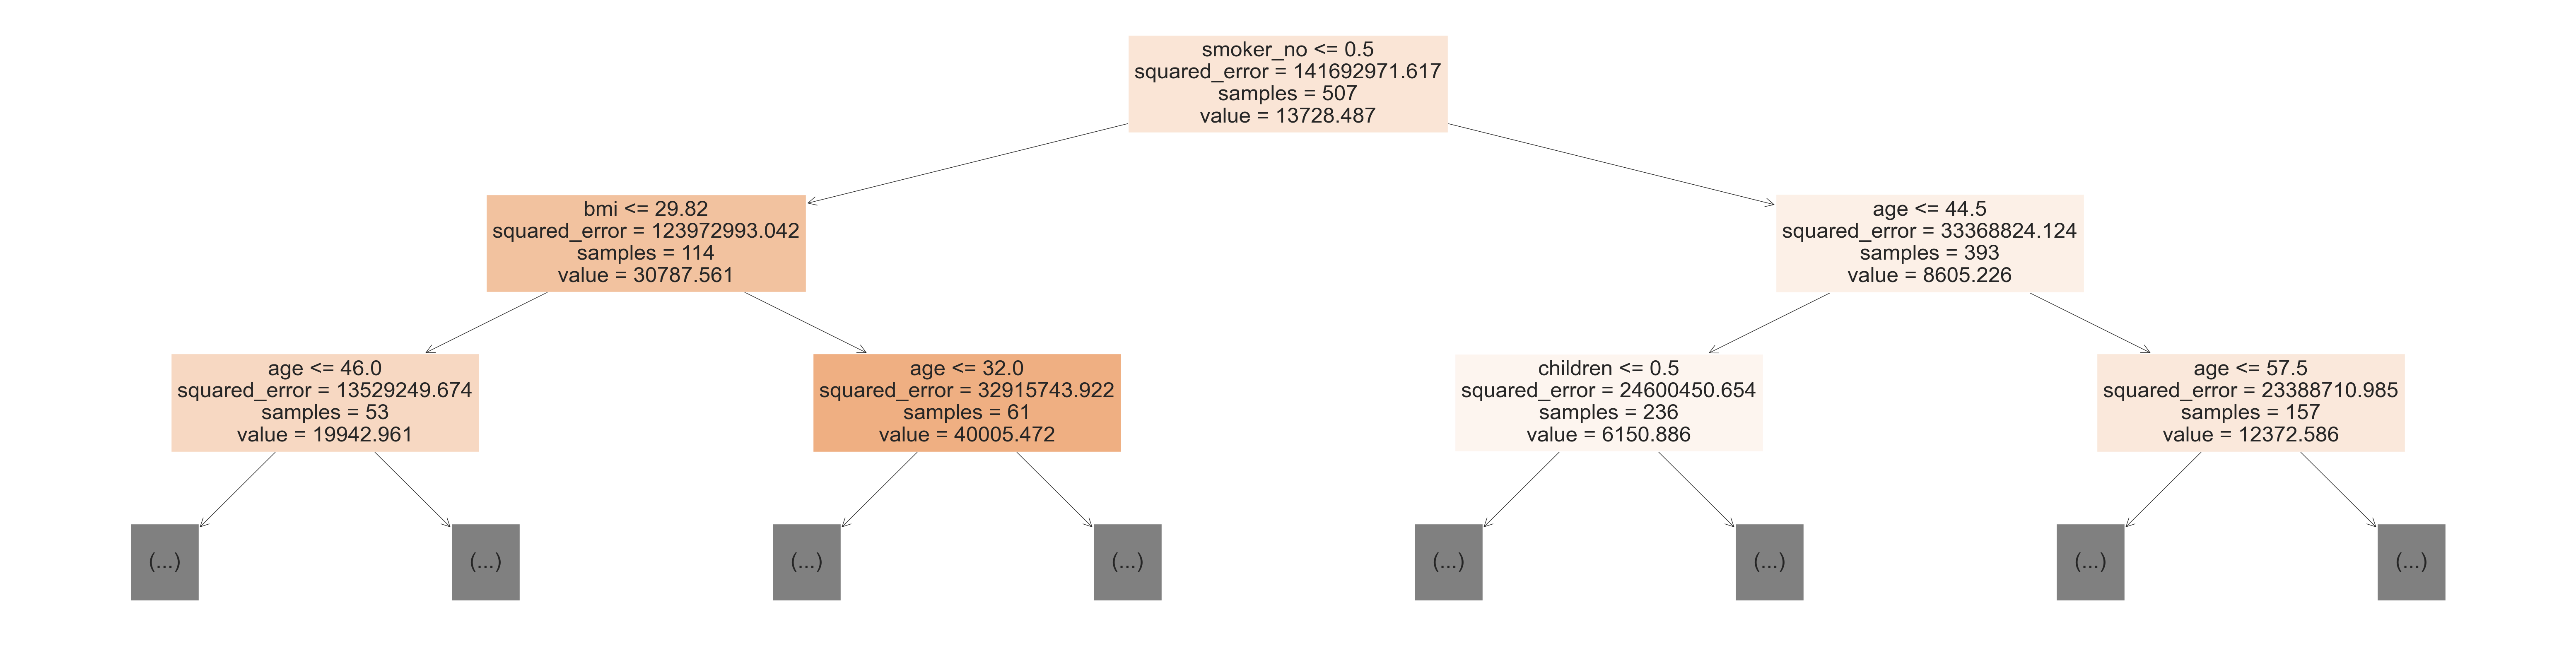

In [132]:
# displaying the first descision tree with max_depth set to 2
plt.figure(figsize=(80,20))
plot_tree(forest.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True);

In [133]:
len(forest.estimators_)

100

In [134]:
tree_text = export_text(forest.estimators_[0], max_depth=2, feature_names=list(X_train.columns))
print(tree_text)

|--- smoker_no <= 0.50
|   |--- bmi <= 29.82
|   |   |--- age <= 46.00
|   |   |   |--- truncated branch of depth 11
|   |   |--- age >  46.00
|   |   |   |--- truncated branch of depth 7
|   |--- bmi >  29.82
|   |   |--- age <= 32.00
|   |   |   |--- truncated branch of depth 8
|   |   |--- age >  32.00
|   |   |   |--- truncated branch of depth 12
|--- smoker_no >  0.50
|   |--- age <= 44.50
|   |   |--- children <= 0.50
|   |   |   |--- truncated branch of depth 15
|   |   |--- children >  0.50
|   |   |   |--- truncated branch of depth 15
|   |--- age >  44.50
|   |   |--- age <= 57.50
|   |   |   |--- truncated branch of depth 13
|   |   |--- age >  57.50
|   |   |   |--- truncated branch of depth 13



In [135]:
# feature importance
forest.feature_importances_

array([0.12953011, 0.20892455, 0.02288357, 0.00365645, 0.00331061,
       0.39273064, 0.21907518, 0.00451925, 0.00476303, 0.00541246,
       0.00519416])

In [136]:
importances = {
    'Features':X_train.columns,
    'Weights':tree.feature_importances_
}

importances = pd.DataFrame(importances).sort_values('Weights', ascending = False)
importances

,Features,Weights
5,smoker_no,0.715674
1,bmi,0.178070
0,age,0.098708
2,children,0.007548
3,sex_female,0.000000
4,sex_male,0.000000
6,smoker_yes,0.000000
7,region_northeast,0.000000
8,region_northwest,0.000000
9,region_southeast,0.000000


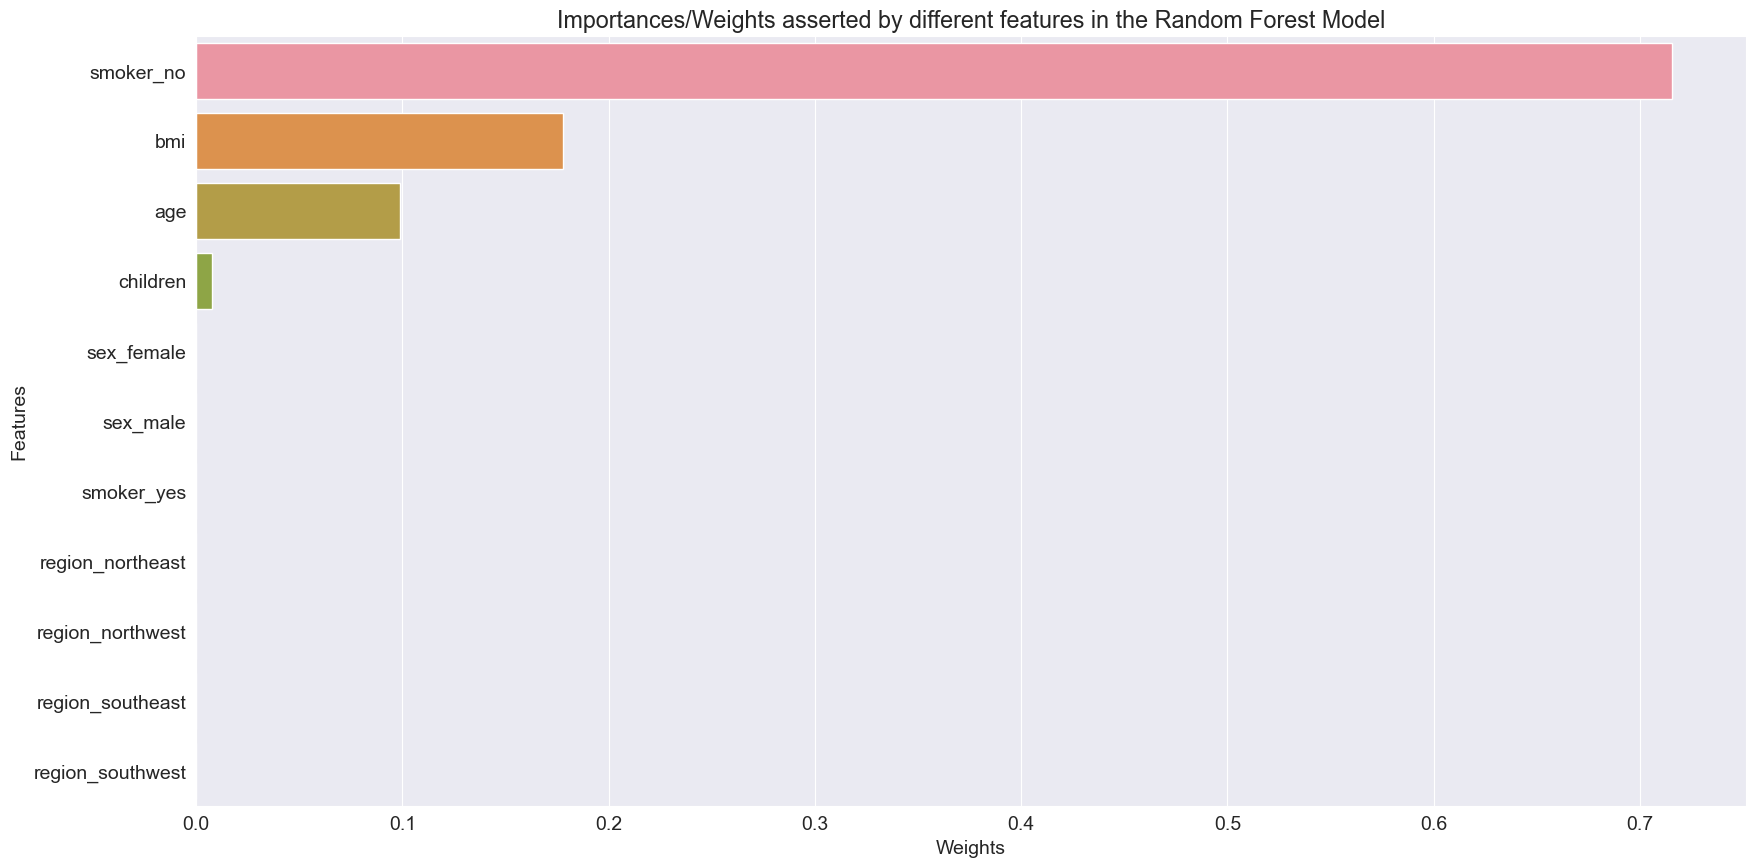

In [137]:
plt.title("Importances/Weights asserted by different features in the Random Forest Model")
sns.barplot(x = 'Weights', y ='Features', data = importances);

### 4.2 Hyperparamter Tuning for Random Forest Model


We will tune the following hyperparameters for our random forest model:

n_estimators (number of descision trees to use)

max_depth

max_leaf_nodes

### Tuning the hyperparameter n_estimators

By default, the hyperparameter n_estimators is set to 100.

In [138]:
n_estimators_values = list(range(50,550,50))

training_rmse = []
validation_rmse = []

In [139]:
for i in n_estimators_values:
  forest = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,forest.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,forest.predict(X_val))))

In [140]:
errors_df = pd.DataFrame({
    'n_estimators':n_estimators_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df.sort_values('Validation RMSE',ascending = True)

,n_estimators,Training RMSE,Validation RMSE
9,500,1774.841439,5122.531851
8,450,1774.706024,5122.818815
7,400,1772.201069,5123.195986
3,200,1785.869482,5125.677558
6,350,1766.799825,5126.589956
5,300,1771.046250,5126.903686
2,150,1784.170025,5129.047589
4,250,1777.368438,5130.472152
1,100,1826.700920,5131.546793
0,50,1868.165550,5149.488527


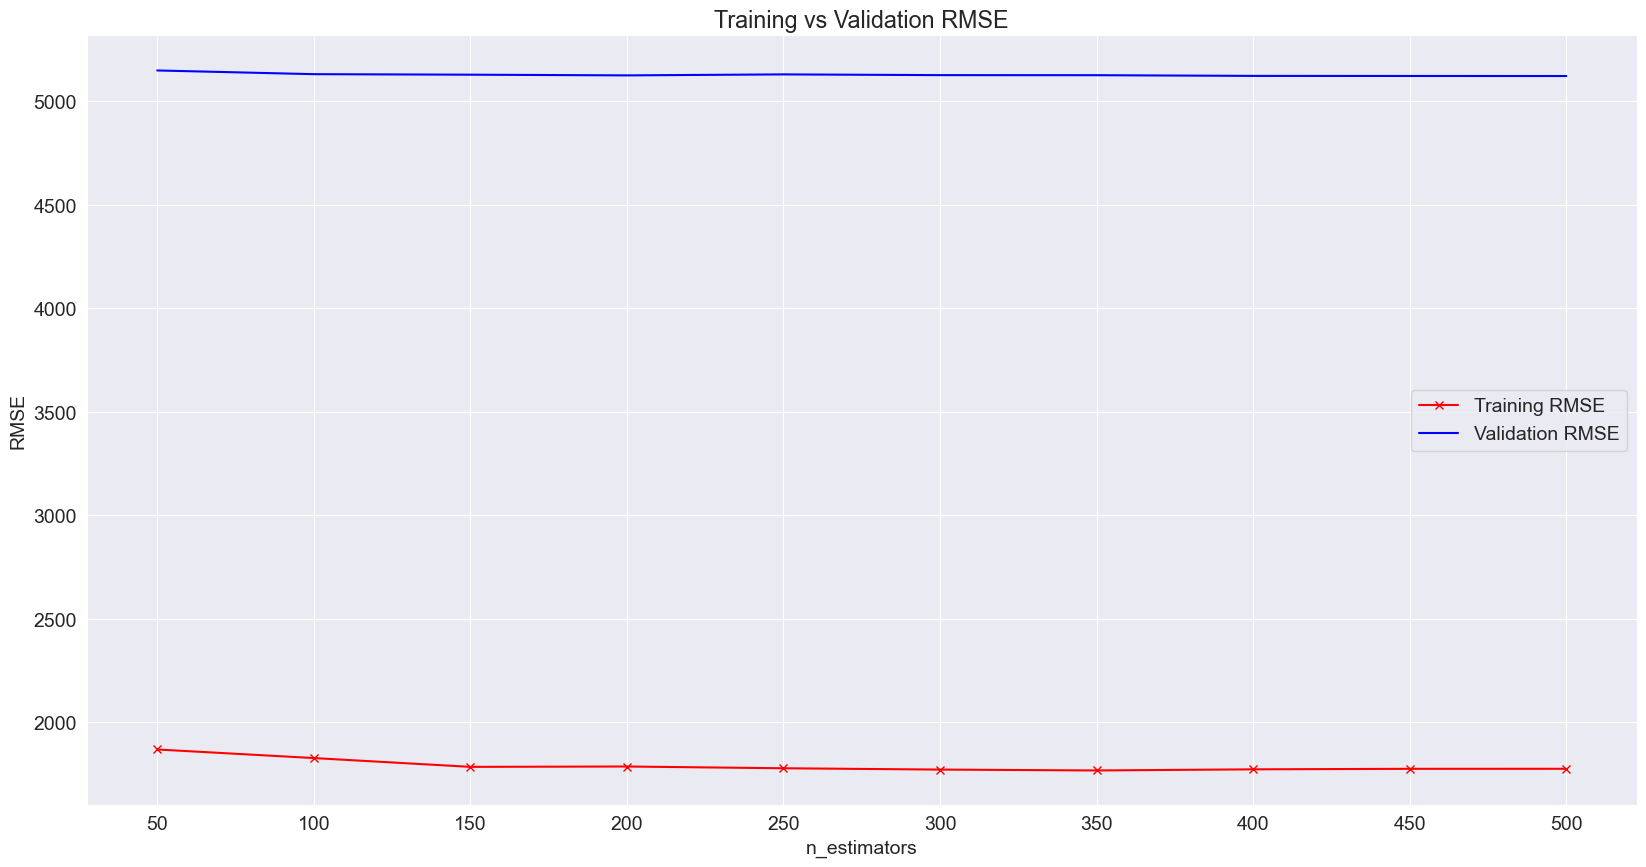

In [141]:
# plotting in graph
plt.title('Training vs Validation RMSE')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.plot(errors_df['n_estimators'], errors_df["Training RMSE"], color = 'red', marker = 'x')
plt.plot(errors_df['n_estimators'], errors_df["Validation RMSE"], color = 'blue')
plt.xticks(n_estimators_values)
plt.legend(['Training RMSE','Validation RMSE']);

Our model has lowest validation RMSE when n_estimators = 200. Thus, we will tune our model that way.

#### Tuning the Hyperparameter max_depth

In [142]:
max_depth_values = list(range(2,24,2))

training_rmse = []
validation_rmse = []

In [143]:
for i in max_depth_values:
  forest = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,forest.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,forest.predict(X_val))))

In [144]:
errors_df = pd.DataFrame({
    'Max Depth':max_depth_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df.sort_values('Validation RMSE',ascending = True)

,Max Depth,Training RMSE,Validation RMSE
1,4,4145.659220,4840.391728
2,6,3421.371934,4943.974215
3,8,2583.497569,5032.519204
4,10,2053.712474,5098.798704
5,12,1858.748417,5113.811547
7,16,1784.387041,5117.796765
8,18,1784.542323,5122.561459
10,22,1785.869482,5125.677558
9,20,1785.256303,5127.336302
6,14,1800.240072,5136.532661


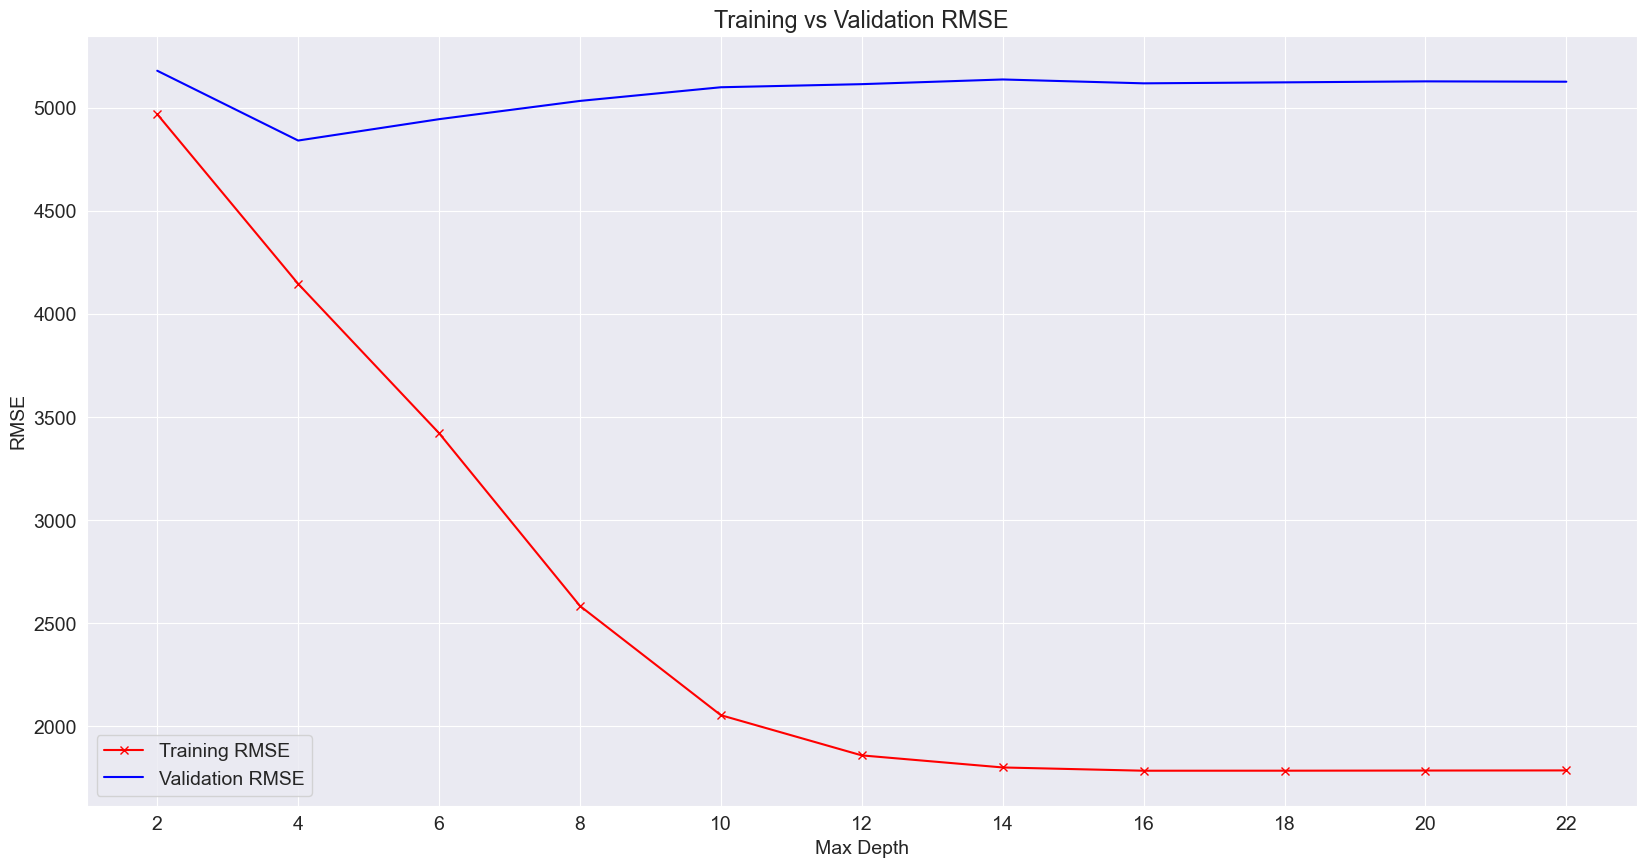

In [145]:
# plotting in graph
plt.title('Training vs Validation RMSE')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.plot(errors_df['Max Depth'], errors_df["Training RMSE"], color = 'red', marker = 'x')
plt.plot(errors_df['Max Depth'], errors_df["Validation RMSE"], color = 'blue')
plt.xticks(max_depth_values)
plt.legend(['Training RMSE','Validation RMSE']);

Our model performs best when max_depth = 4. Thus, we will tune our model that way.

#### Tuning the Hyperparameter ma_leaf_nodes

By default, max_leaf_nodes is set to None. If None then unlimited number of leaf nodes.

In [146]:
max_leaf_nodes_values = [2 ** i for i in range(1,11)]

training_rmse = []
validation_rmse = []

In [147]:
for i in max_leaf_nodes_values:
  forest = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 4, max_leaf_nodes = i).fit(X_train,y_train)
  training_rmse.append(np.sqrt(mean_squared_error(y_train,forest.predict(X_train))))
  validation_rmse.append(np.sqrt(mean_squared_error(y_val,forest.predict(X_val))))

In [148]:
errors_df = pd.DataFrame({
    'Max_leaf_nodes':max_leaf_nodes_values,
    'Training RMSE':training_rmse,
    'Validation RMSE':validation_rmse
})
errors_df.sort_values('Validation RMSE',ascending = True)

,Max_leaf_nodes,Training RMSE,Validation RMSE
3,16,4145.720888,4839.778078
4,32,4145.720888,4839.778078
6,128,4145.720888,4839.778078
7,256,4145.720888,4839.778078
5,64,4145.720888,4839.778078
8,512,4145.720888,4839.778078
9,1024,4145.720888,4839.778078
2,8,4417.953943,4889.600436
1,4,4968.194100,5178.956601
0,2,7422.304840,7361.605798


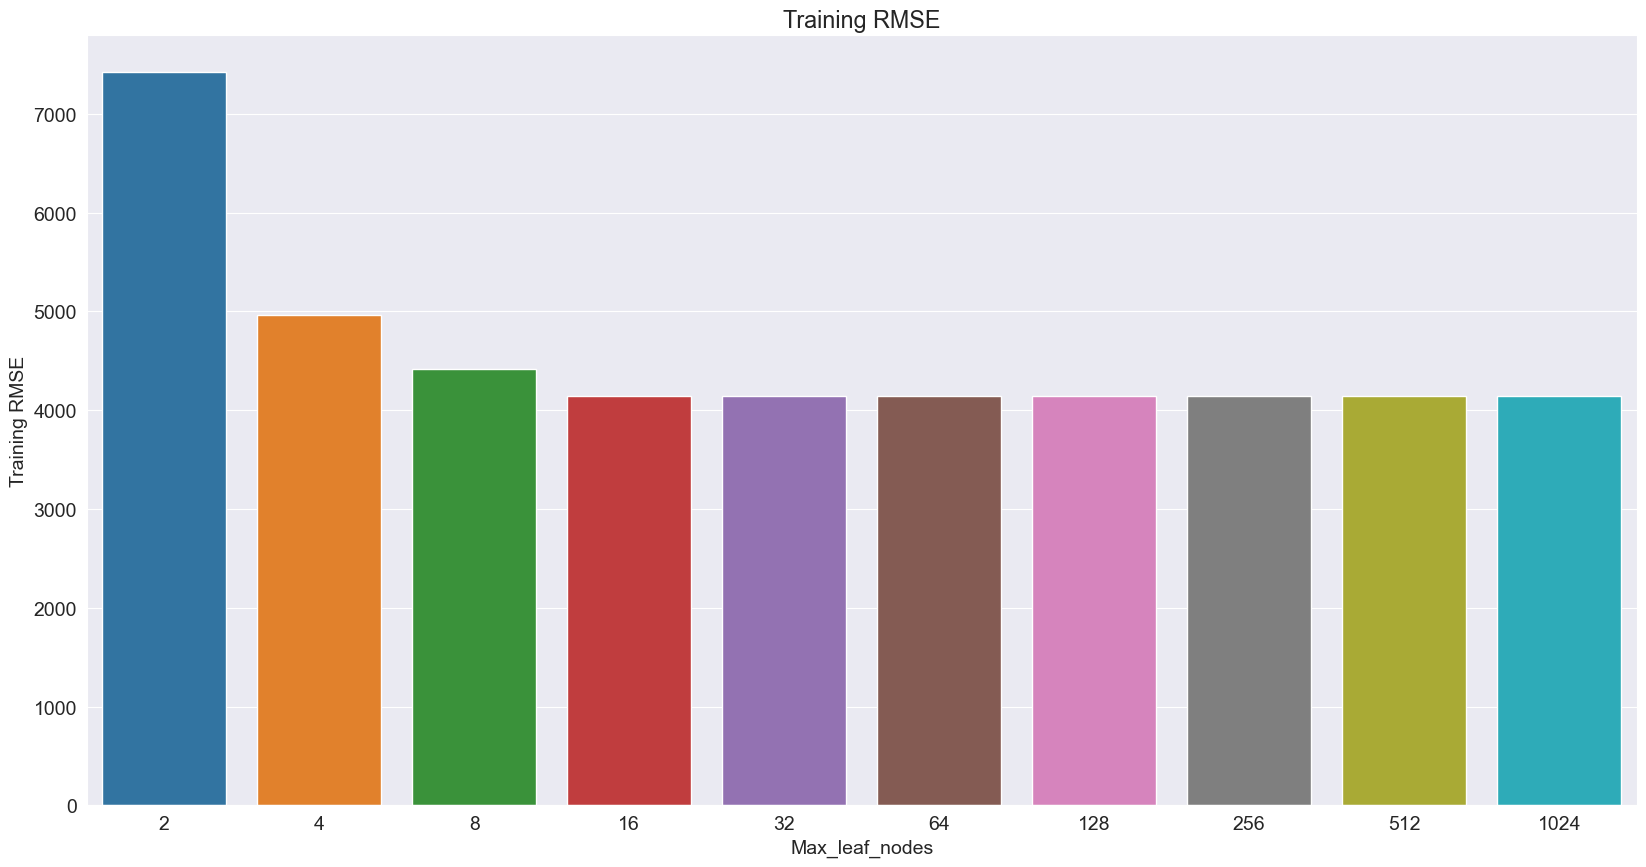

In [149]:
# plotting in graph
plt.title('Training RMSE')
sns.barplot(x = 'Max_leaf_nodes', y = 'Training RMSE', data = errors_df);

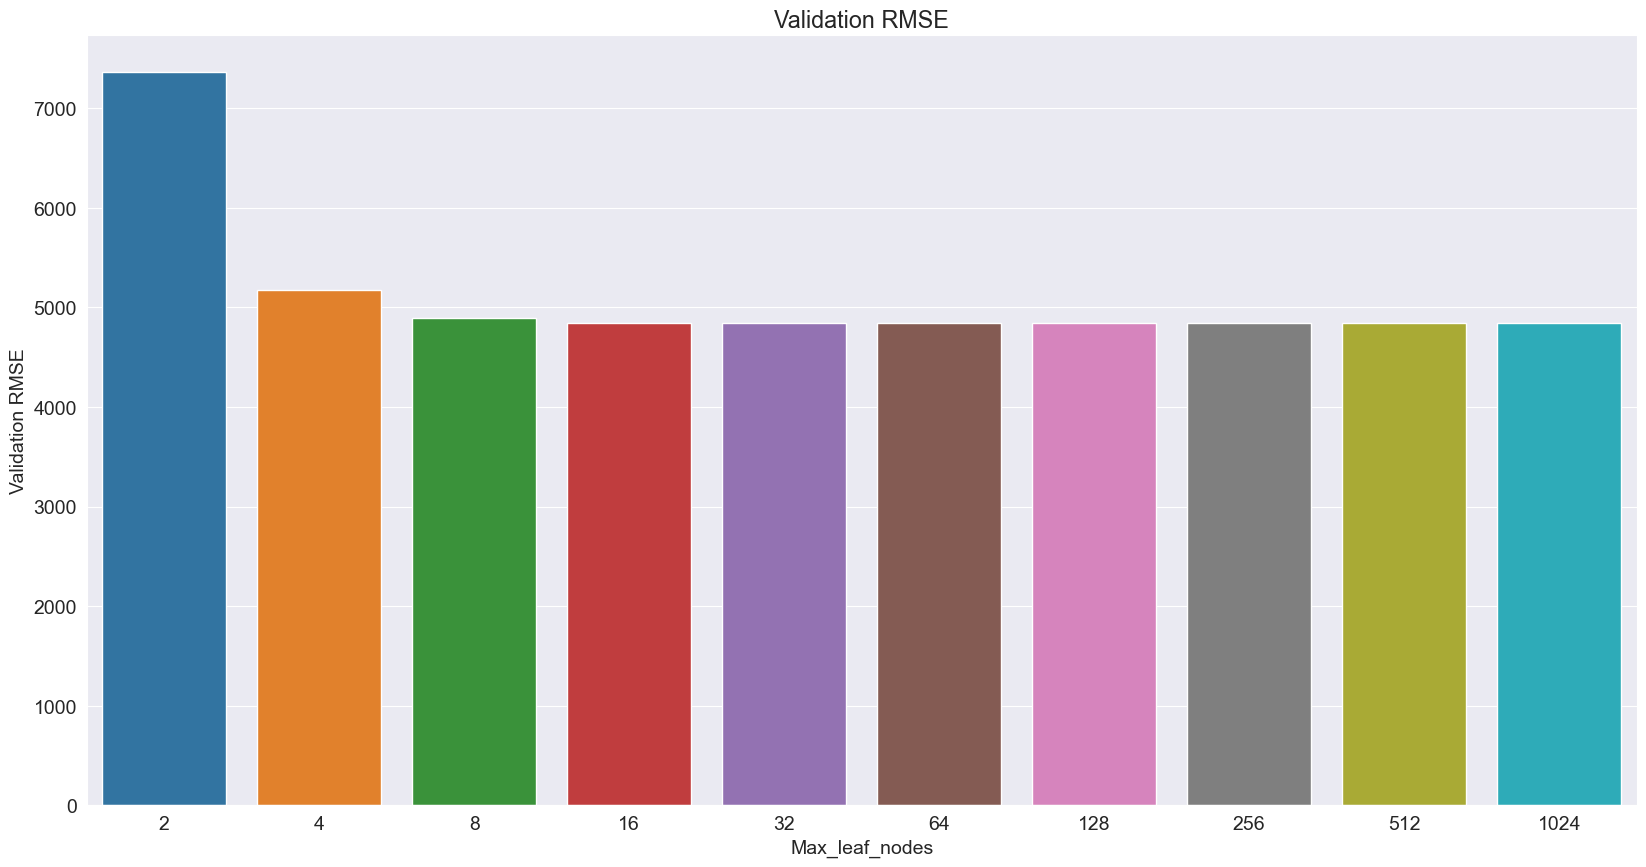

In [150]:
# plotting in graph
plt.title('Validation RMSE')
sns.barplot(x = 'Max_leaf_nodes', y = 'Validation RMSE', data = errors_df);

Our model has lowest training and validation RMSE when max_leaf_nodes = 16. Thus, we will tune our model that way.

### 4.3 Making Predictions on Testing Data

In [151]:
# Optimized Model
forest = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 200, max_depth = 4, max_leaf_nodes = 16).fit(X_train,y_train)

In [152]:
test_pred = forest.predict(X_test)

In [153]:
print("RMSE on Testing Data = ", np.sqrt(mean_squared_error(y_test,test_pred)))

RMSE on Testing Data =  4297.033550186006


Our random forest Model has performed even better than the descision tree model.

## Model Comparision and Model Accuracy

In [155]:
DecisionTreeRegressorScore = tree.score(X_test, y_test)
print("Accuracy obtained by Decision Tree Regressor model:",DecisionTreeRegressorScore*100)

Accuracy obtained by Decision Tree Regressor model: 89.05178008813354


In [180]:
KNeighborsRegressorScore = Knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Regressor model:",KNeighborsRegressorScore*100)

Accuracy obtained by K Neighbors Regressor model: 19.662606951916782


In [178]:
LinearRegressionScore = log_reg.score(X_test, y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 80.57067181435494


In [179]:
RandomForestRegressorScore = forest.score(X_test, y_test)
print("Accuracy obtained by Random Forest Regressor model:",RandomForestRegressorScore*100)

Accuracy obtained by Random Forest Regressor model: 89.95162558156757


C:\Users\D3675166\AppData\Local\Temp\ipykernel_8900\1701005950.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


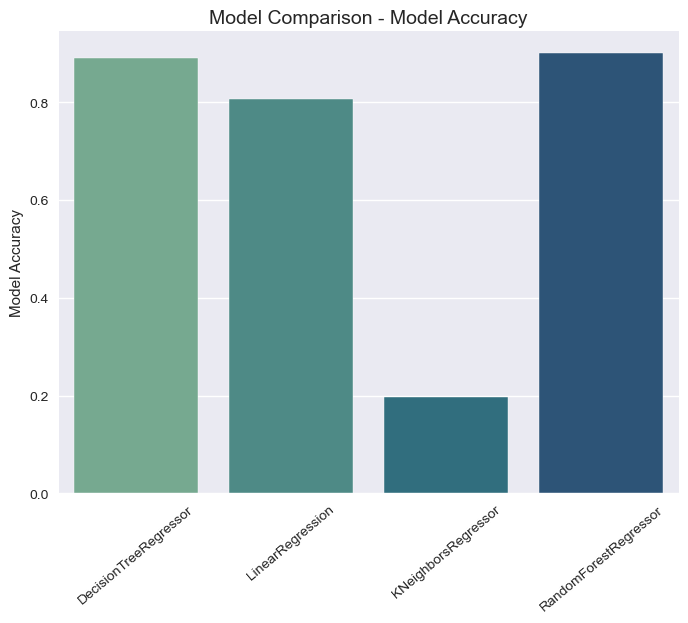

In [176]:
plt.style.use("seaborn")

# Update model names and scores excluding AdaBoostRegressor and GradientBoostingRegressor
x = ["DecisionTreeRegressor",
     "LinearRegression", 
     "KNeighborsRegressor", 
     "RandomForestRegressor"]

y = [DecisionTreeRegressorScore,
     LinearRegressionScore, 
     KNeighborsRegressorScore, 
     RandomForestRegressorScore]

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=x, y=y, palette="crest")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14)

# Set a different font family
plt.rcParams['font.family'] = 'Arial'

plt.show()